In [1]:
%cd C:\Users\yukir\Documents\GitHub\Scrapper\py

from nlp_processing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine

C:\Users\yukir\Documents\GitHub\Scrapper\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10644466891185932014
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11339931745027838091
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13793397041247482261
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4474744026194396086
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine


In [2]:
final_review = pd.read_csv("C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\final_reviews.csv", index_col = 0)
final_review.head(2)

hospital  stars                                            reviews adress
0  청주나비솔한의원   10.0  병원이 전반적으로 깔끔해서 쾌적했어요대기가 좀 있지만 심하진 않은편이었고 간호사분들...     충북
1  청주나비솔한의원    7.5  체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그...     충북

Text(0.5, 1.0, '안녕')

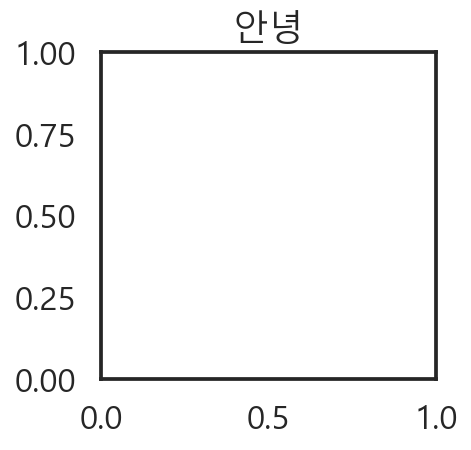

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (3,3))
plt.rc('font', family='Malgun Gothic') 
%config InlineBackend.figure_format = 'retina'
plt.title("안녕")

In [4]:
df = final_review.copy()
print(df.shape)

(14989, 4)


In [5]:
df = df.dropna(axis=0)
print(df.shape)

(14988, 4)


{'whiskers': [<matplotlib.lines.Line2D at 0x151e1eab8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x151e1eabf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x151e1eab490>],
 'medians': [<matplotlib.lines.Line2D at 0x151e1ec26a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x151e1ec2a30>],
 'means': []}

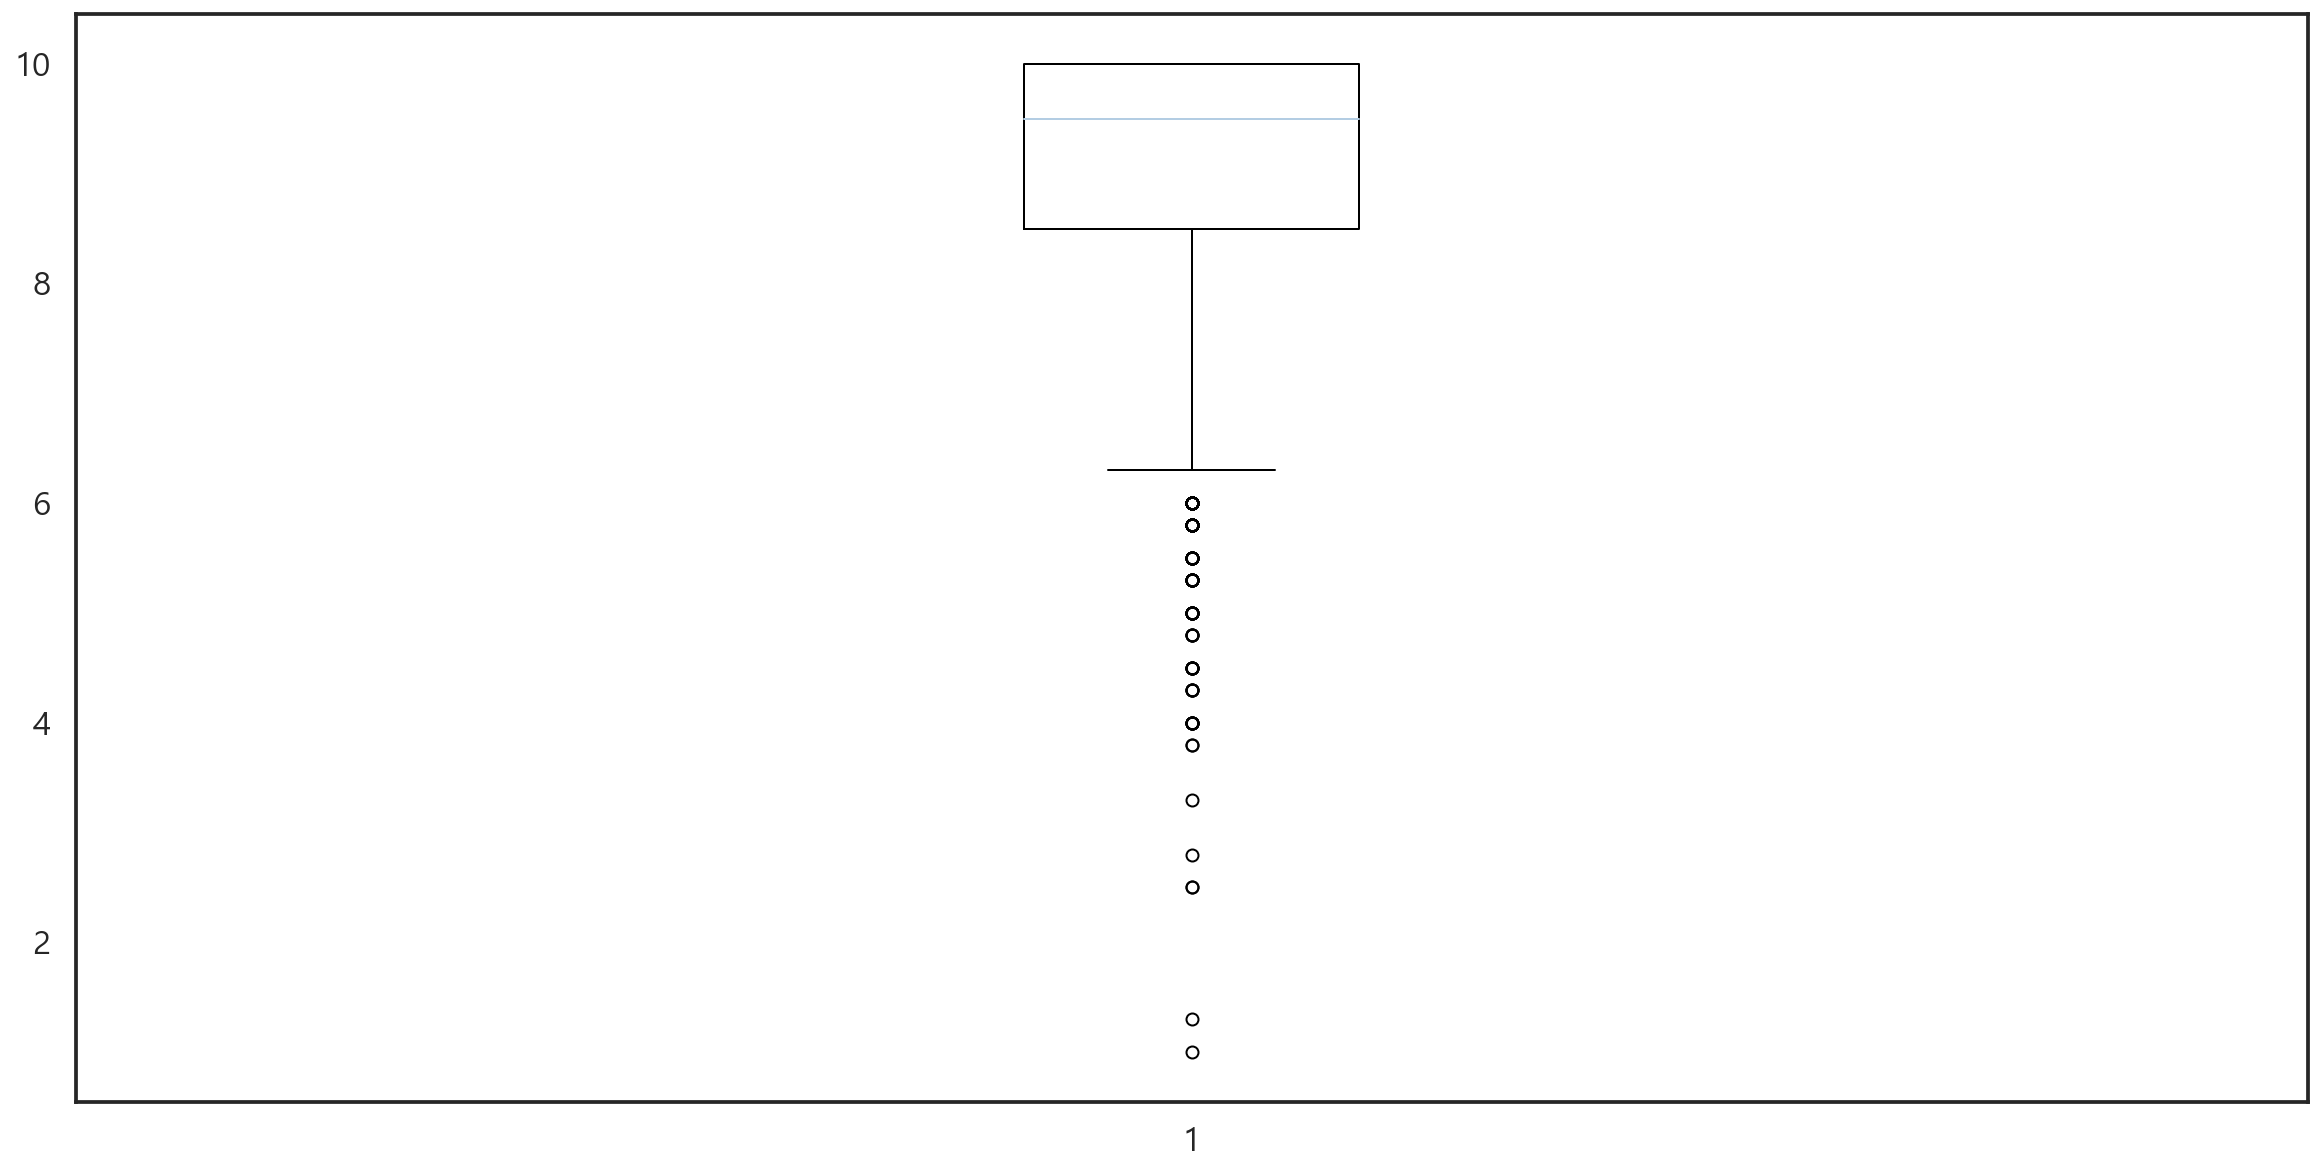

In [6]:
kyungki= df[df['adress'] == '경기']
plt.boxplot(kyungki.stars)

In [7]:
df_more6 = kyungki[kyungki['stars'] <= 6.2]
print(df_more6.shape)
df_more6.head()

(114, 4)


hospital  stars                                            reviews adress
228   포도나무한의원    5.0  병원은 깨끗해요 근데 환자가 의견을 내면 되게싫어해요 여기맞고 더아프다고 말하는데 ...     경기
234  올바른경희한의원    5.8  예약 없이 대기시간 5분이내로빠른 진료가능했어요첫진료라 어떤 치료를 하는지 설명해주...     경기
235  올바른경희한의원    5.8  기력이 딸리는 것 같아서 집근처 보약 지어먹을려고 방문하였습니다 보약 때문에 왔다고...     경기
2    삼성서울연합의원    6.0  어르신들이 많아 대기가 엄청 길었어요 진료 처음에는 맥도 봐주셨지만 디테일하다고 느...     경기
23      행복한의원    6.0  부담이 느껴져서 아쉽습니다허리통증으로 내원하여 침치료와 추나요법을 받았습니다 의사선...     경기

In [8]:
from konlpy.tag import Okt
okt = Okt()

In [9]:
def make_noun(x):
    x = okt.nouns(x)
    return x

In [10]:
df_more6['reviews'] = df_more6['reviews'].apply(make_noun)
for_network = df_more6.copy()
df_more6['reviews'].head()

C:\Users\yukir\AppData\Local\Temp/ipykernel_796/3817455113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews'] = df_more6['reviews'].apply(make_noun)


228    [병원, 환자, 의견, 내면, 여기, 더, 말, 약간, 니, 뭘알, 느낌, 침, 치...
234    [예약, 대기, 시간, 진료, 진료, 치료, 설명, 진료, 비, 안내, 침, 권유,...
235    [기력, 것, 집, 근처, 보약, 방문, 보약, 때문, 하니, 검사, 및, 상담, ...
2      [어르신, 대기, 진료, 처음, 맥, 디테, 대기, 시간, 진료, 시간, 제대로, ...
23     [부담, 허리, 통증, 내, 침, 치료, 추나, 요법, 의사, 선생님, 한약, 진료...
Name: reviews, dtype: object

In [11]:
# 여기서부터 조심해서 네트워크 해보기
df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]
df_more6['reviews'].head() 

C:\Users\yukir\AppData\Local\Temp/ipykernel_796/853035387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]


228    병원 환자 의견 내면 여기 더 말 약간 니 뭘알 느낌 침 치료 다른 환자 의원 주사...
234    예약 대기 시간 진료 진료 치료 설명 진료 비 안내 침 권유 침 부항 제 경우 차도...
235    기력 것 집 근처 보약 방문 보약 때문 하니 검사 및 상담 제 몸 상태 현재 심리 ...
2      어르신 대기 진료 처음 맥 디테 대기 시간 진료 시간 제대로 다시 오라 때 조금 반...
23     부담 허리 통증 내 침 치료 추나 요법 의사 선생님 한약 진료 때 다음 방문 예약 ...
Name: reviews, dtype: object

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(1, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 1000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

TfidfVectorizer(max_features=1000, min_df=2, ngram_range=(1, 6))

In [13]:
# df['covid'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df_more6['reviews'])
feature_vector.shape

(114, 1000)

In [14]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

1000


['가격',
 '가기',
 '가량',
 '가야',
 '가야 진료',
 '가야 진료 자체',
 '가야 진료 자체 진행',
 '가야 진료 자체 진행 진료',
 '가야 진료 자체 진행 진료 재차',
 '가족']

In [15]:
pd.DataFrame(feature_vector[:].toarray(), columns=vocab).head()

가격   가기   가량   가야  가야 진료  가야 진료 자체  가야 진료 자체 진행  가야 진료 자체 진행 진료  \
0  0.0  0.0  0.0  0.0    0.0       0.0          0.0             0.0   
1  0.0  0.0  0.0  0.0    0.0       0.0          0.0             0.0   
2  0.0  0.0  0.0  0.0    0.0       0.0          0.0             0.0   
3  0.0  0.0  0.0  0.0    0.0       0.0          0.0             0.0   
4  0.0  0.0  0.0  0.0    0.0       0.0          0.0             0.0   

   가야 진료 자체 진행 진료 재차   가족        가지  간호사  간호사 의사  간호사 치료  감수성  감수성 매우  \
0                0.0  0.0  0.000000  0.0     0.0     0.0  0.0     0.0   
1                0.0  0.0  0.000000  0.0     0.0     0.0  0.0     0.0   
2                0.0  0.0  0.124616  0.0     0.0     0.0  0.0     0.0   
3                0.0  0.0  0.000000  0.0     0.0     0.0  0.0     0.0   
4                0.0  0.0  0.000000  0.0     0.0     0.0  0.0     0.0   

   감수성 매우 발언  감수성 매우 발언 정치  감수성 매우 발언 정치 견해  감수성 매우 발언 정치 견해 농담  갑자기   강매  \
0        0.0           0.0              0.0                 0.0  0.0  0.0   
1        0.0           0.0              0.0                 0.0  0.0  0.0   
2        0.0           0.0              0.0                 0.0  0.0  0.0   
3        0.0           0.0              0.0                 0.0  0.0  0.0   
4        0.0           0.0              0.0                 0.0  0.0  0.0   

    강요   강의  강의 지칭  강의 지칭 설명  강의 지칭 설명 식사  강의 지칭 설명 식사 시간  강의 지칭 설명 식사 시간 다시  \
0  0.0  0.0    0.0       0.0          0.0             0.0                0.0   
1  0.0  0.0    0.0       0.0          0.0             0.0                0.0   
2  0.0  0.0    0.0       0.0          0.0             0.0                0.0   
3  0.0  0.0    0.0       0.0          0.0             0.0                0.0   
4  0.0  0.0    0.0       0.0          0.0             0.0                0.0   

    개선   개월   거기   거리   거의   건강   건데   건물        검사  검사 체중  검사 체중 혈압  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    0.0       0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    0.0       0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.115547    0.0       0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    0.0       0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    0.0       0.0   

   검사 체중 혈압 포함  검사 체중 혈압 포함 시간  검사 체중 혈압 포함 시간 정도   견해  견해 농담  견해 농담 차례  \
0          0.0             0.0                0.0  0.0    0.0       0.0   
1          0.0             0.0                0.0  0.0    0.0       0.0   
2          0.0             0.0                0.0  0.0    0.0       0.0   
3          0.0             0.0                0.0  0.0    0.0       0.0   
4          0.0             0.0                0.0  0.0    0.0       0.0   

   견해 농담 차례 임본  견해 농담 차례 임본 인과  견해 농담 차례 임본 인과 견해  견해 진료  ...  한의원 진료  한의원 환자  \
0          0.0             0.0                0.0    0.0  ...     0.0     0.0   
1          0.0             0.0                0.0    0.0  ...     0.0     0.0   
2          0.0             0.0                0.0    0.0  ...     0.0     0.0   
3          0.0             0.0                0.0    0.0  ...     0.0     0.0   
4          0.0             0.0                0.0    0.0  ...     0.0     0.0   

    한참   항상   해도  해주시        허리     허리 통증        현재   혈도   혈압  혈압 포함  \
0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0    0.0   
1  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0    0.0   
2  0.0  0.0  0.0  0.0  0.000000  0.000000  0.137397  0.0  0.0    0.0   
3  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.0    0.0   
4  0.0  0.0  0.0  0.0  0.157853  0.181106  0.000000  0.0  0.0    0.0   

   혈압 포함 시간  혈압 포함 시간 정도  혈압 포함 시간 정도 대기  혈압 포함 시간 정도 대기 동안   호전   확인  확인 내외  \
0       0.0          0.0             0.0                0.0  0.0  0.0    0.0   
1       0.0          0.0             0.0                0.0  0.0  0.0    0.0   
2       0.0          0.0             0.0                0.0  0.0  0.0    0.0   
3       0.0          0.0             0.0                0.0  0.0  0.0 

In [16]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
df_freq.to_excel('df_freq.xlsx', encoding= 'utf-8')

(1, 1000)


In [17]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(100)

0
진료   7.635908
병원   7.375054
치료   6.950968
방문   6.271084
의사   5.816691
..        ...
마사지  1.125788
계속   1.124597
다만   1.117039
바로   1.115756
부위   1.097210

[100 rows x 1 columns]

In [18]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["words", "freq"]
df_freq_T.tail()
# df_freq_T.to_excel('df_freq_T.xlsx', encoding= 'utf-8')

words      freq
995               후기  0.410305
996            후기 모두  0.083355
997         후기 모두 동의  0.083355
998      후기 모두 동의 성인  0.083355
999  후기 모두 동의 성인 감수성  0.083355

In [19]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 중복을 삭제 합니다.
print(df_freq_T.shape)
df_use = df_freq_T.drop_duplicates()
print(df_use.shape)

(1000, 2)
(1000, 2)


In [20]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_use = df_use.sort_values(by="freq", ascending=False)
df_use.head(20)

words      freq
748    진료  7.635908
331    병원  7.375054
862    치료  6.950968
327    방문  6.271084
518    의사  5.816691
945   한의원  4.967362
737    직원  4.676181
357   선생님  4.624916
992    효과  4.405354
360    설명  4.175462
394    시간  3.735974
978    환자  3.707384
942    한약  3.588968
324  물리치료  3.532722
146    느낌  3.487655
512    원장  3.381982
349    사람  3.277168
171    대기  3.222052
816    처음  3.193713
427    시설  3.125941

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\backends\backend_agg.py:240: Runtim

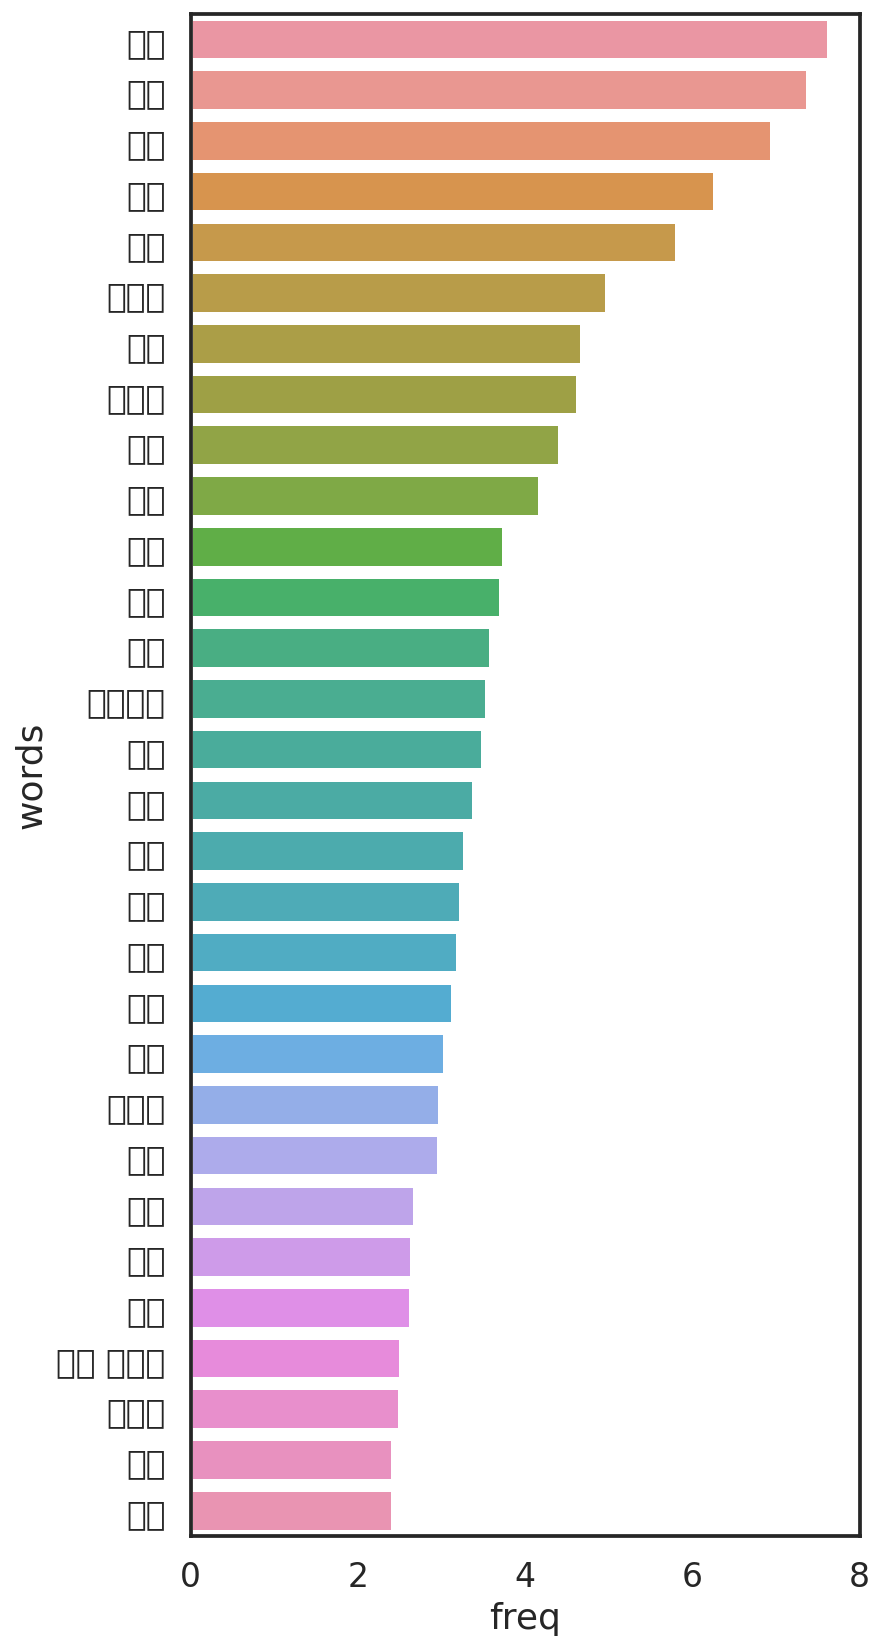

In [21]:
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,14))
ax = sns.barplot(x = 'freq', y = 'words', 
                 data = df_use.sort_values(by = 'freq', 
                                               ascending = False).head(30))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
# plt.savefig('covid2_frequency.png')
plt.show()


In [22]:
words_v2 = []

for num, i in enumerate (df_use.words):
  words_v2.append((i, int(df_use.freq[num])))

words_clean = words_v2.copy()

In [23]:
words_clean[:10]

[('진료', 1),
 ('병원', 0),
 ('치료', 0),
 ('방문', 0),
 ('의사', 0),
 ('한의원', 0),
 ('직원', 0),
 ('선생님', 0),
 ('효과', 0),
 ('설명', 0)]

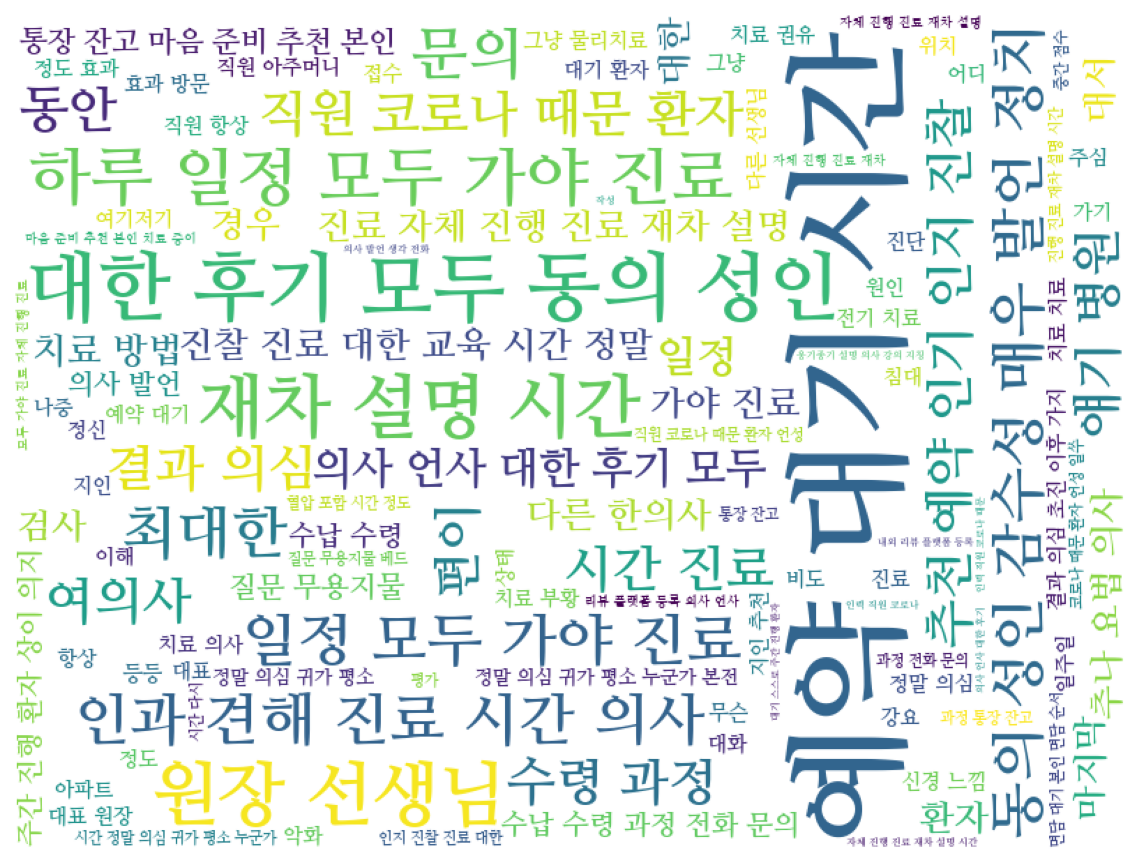

In [25]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **FINE**

In [26]:
words_clean

[('진료', 1),
 ('병원', 0),
 ('치료', 0),
 ('방문', 0),
 ('의사', 0),
 ('한의원', 0),
 ('직원', 0),
 ('선생님', 0),
 ('효과', 0),
 ('설명', 0),
 ('시간', 0),
 ('환자', 2),
 ('한약', 0),
 ('물리치료', 0),
 ('느낌', 0),
 ('원장', 0),
 ('사람', 0),
 ('대기', 0),
 ('처음', 0),
 ('시설', 0),
 ('그냥', 1),
 ('간호사', 0),
 ('다른', 0),
 ('별로', 0),
 ('상담', 0),
 ('생각', 0),
 ('의사 선생님', 0),
 ('한의사', 0),
 ('통증', 0),
 ('근처', 0),
 ('매우', 0),
 ('추천', 0),
 ('조금', 0),
 ('정도', 1),
 ('다시', 0),
 ('예약', 0),
 ('상태', 1),
 ('위치', 1),
 ('추나', 0),
 ('보고', 0),
 ('방문 의사', 0),
 ('진짜', 0),
 ('어깨', 0),
 ('다음', 0),
 ('말씀', 0),
 ('여기', 0),
 ('보약', 0),
 ('가격', 0),
 ('얘기', 0),
 ('비용', 0),
 ('허리', 0),
 ('증상', 0),
 ('기계', 0),
 ('기분', 0),
 ('때문', 0),
 ('보통', 0),
 ('친절', 0),
 ('한번', 0),
 ('복용', 0),
 ('건물', 0),
 ('정말', 0),
 ('확인', 0),
 ('호전', 0),
 ('부항', 0),
 ('처방', 0),
 ('대기 시간', 0),
 ('피부', 0),
 ('자주', 0),
 ('원인', 1),
 ('대해', 0),
 ('마음', 0),
 ('기억', 0),
 ('침술', 0),
 ('주변', 0),
 ('교통사고', 0),
 ('병원 시설', 0),
 ('동네', 0),
 ('주말', 0),
 ('그닥', 0),
 ('여자', 0),
 ('약간', 0),
 ('거의',

In [27]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '의심' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

293 ('의심', 0)
386 ('의심 초진', 0)
387 ('결과 의심 초진 이후', 0)
388 ('의심 초진 이후', 0)
391 ('의심 귀가 평소 누군가 본전 마음', 0)
392 ('의심 귀가', 0)
394 ('결과 의심', 3)
395 ('결과 의심 초진', 0)
396 ('의심 귀가 평소 누군가 본전', 0)
398 ('의심 귀가 평소', 0)
400 ('의심 귀가 평소 누군가', 0)
406 ('추천 결과 의심', 0)
407 ('추천 결과 의심 초진', 0)
408 ('추천 결과 의심 초진 이후', 0)
414 ('대한 교육 시간 정말 의심', 0)
416 ('대한 교육 시간 정말 의심 귀가', 0)
417 ('추천 결과 의심 초진 이후 가지', 0)
418 ('결단 추천 결과 의심', 0)
419 ('결단 추천 결과 의심 초진', 0)
420 ('결단 추천 결과 의심 초진 이후', 0)
430 ('결과 의심 초진 이후 가지', 1)
433 ('의심 초진 이후 가지', 0)
434 ('시간 정말 의심 귀가', 0)
438 ('진료 대한 교육 시간 정말 의심', 0)
456 ('정말 의심', 1)
457 ('정말 의심 귀가', 0)
458 ('정말 의심 귀가 평소', 1)
459 ('정말 의심 귀가 평소 누군가', 0)
460 ('정말 의심 귀가 평소 누군가 본전', 1)
464 ('마음 결단 추천 결과 의심', 0)
465 ('마음 결단 추천 결과 의심 초진', 0)
476 ('시간 정말 의심 귀가 평소 누군가', 1)
477 ('시간 정말 의심 귀가 평소', 0)
479 ('시간 정말 의심', 0)
484 ('교육 시간 정말 의심 귀가 평소', 0)
496 ('교육 시간 정말 의심', 0)
497 ('교육 시간 정말 의심 귀가', 0)
8
37
37


In [28]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '예약' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

35 ('예약', 0)
240 ('예약 예약', 0)
331 ('예약 대기 시간', 7)
332 ('예약 대기', 1)
374 ('예약 방문', 0)
389 ('확인 지인 추천 예약 인기 인지', 0)
393 ('확인 지인 추천 예약 인기', 0)
401 ('확인 지인 추천 예약', 0)
403 ('추천 예약 인기 인지 진찰 진료', 0)
404 ('체질 확인 지인 추천 예약', 0)
405 ('체질 확인 지인 추천 예약 인기', 0)
409 ('예약 인기 인지 진찰 진료 대한', 0)
410 ('예약 인기 인지 진찰 진료', 0)
411 ('예약 인기 인지 진찰', 0)
412 ('예약 인기 인지', 0)
413 ('예약 인기', 0)
424 ('추천 예약', 0)
425 ('추천 예약 인기', 0)
426 ('추천 예약 인기 인지', 0)
427 ('추천 예약 인기 인지 진찰', 3)
448 ('지인 추천 예약 인기 인지 진찰', 0)
449 ('지인 추천 예약 인기 인지', 0)
453 ('지인 추천 예약 인기', 0)
454 ('지인 추천 예약', 0)
850 ('예약 진표', 0)
851 ('예약 진표 작성', 0)
926 ('예약 진표 작성 기본', 0)
947 ('예약 진표 작성 기본 검사', 0)
948 ('예약 진표 작성 기본 검사 체중', 0)
11
29
29


In [29]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '인기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

389 ('확인 지인 추천 예약 인기 인지', 0)
393 ('확인 지인 추천 예약 인기', 0)
403 ('추천 예약 인기 인지 진찰 진료', 0)
405 ('체질 확인 지인 추천 예약 인기', 0)
409 ('예약 인기 인지 진찰 진료 대한', 0)
410 ('예약 인기 인지 진찰 진료', 0)
411 ('예약 인기 인지 진찰', 0)
412 ('예약 인기 인지', 0)
413 ('예약 인기', 0)
425 ('추천 예약 인기', 0)
426 ('추천 예약 인기 인지', 0)
427 ('추천 예약 인기 인지 진찰', 3)
435 ('인기', 0)
436 ('인기 인지', 0)
448 ('지인 추천 예약 인기 인지 진찰', 0)
449 ('지인 추천 예약 인기 인지', 0)
453 ('지인 추천 예약 인기', 0)
470 ('인기 인지 진찰', 0)
471 ('인기 인지 진찰 진료', 0)
472 ('인기 인지 진찰 진료 대한', 0)
473 ('인기 인지 진찰 진료 대한 교육', 0)
3
21
21


In [ ]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '진료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

In [30]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '교육' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

182 ('교육', 0)
414 ('대한 교육 시간 정말 의심', 0)
416 ('대한 교육 시간 정말 의심 귀가', 0)
421 ('대한 교육 시간 정말', 0)
422 ('대한 교육 시간', 0)
423 ('대한 교육', 0)
438 ('진료 대한 교육 시간 정말 의심', 0)
439 ('진료 대한 교육 시간 정말', 0)
440 ('진료 대한 교육 시간', 0)
441 ('진료 대한 교육', 0)
469 ('인지 진찰 진료 대한 교육', 0)
473 ('인기 인지 진찰 진료 대한 교육', 0)
474 ('교육 시간', 0)
483 ('인지 진찰 진료 대한 교육 시간', 0)
484 ('교육 시간 정말 의심 귀가 평소', 0)
485 ('진찰 진료 대한 교육 시간 정말', 2)
486 ('진찰 진료 대한 교육 시간', 0)
487 ('진찰 진료 대한 교육', 0)
495 ('교육 시간 정말', 0)
496 ('교육 시간 정말 의심', 0)
497 ('교육 시간 정말 의심 귀가', 0)
2
21
21


In [32]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '통장' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

613 ('과정 통장', 0)
614 ('과정 통장 잔고', 1)
654 ('통장 잔고 마음', 0)
655 ('통장 잔고 마음 준비', 0)
659 ('통장 잔고 마음 준비 추천', 0)
660 ('통장 잔고 마음 준비 추천 본인', 2)
675 ('통장 잔고', 1)
676 ('통장', 0)
679 ('과정 통장 잔고 마음', 0)
680 ('과정 통장 잔고 마음 준비', 0)
686 ('과정 통장 잔고 마음 준비 추천', 0)
761 ('실행 매우 과정 통장', 0)
762 ('실행 매우 과정 통장 잔고', 0)
763 ('실행 매우 과정 통장 잔고 마음', 0)
785 ('매우 과정 통장 잔고 마음 준비', 0)
786 ('매우 과정 통장 잔고 마음', 0)
787 ('매우 과정 통장 잔고', 0)
788 ('매우 과정 통장', 0)
988 ('의지 실행 매우 과정 통장', 0)
989 ('의지 실행 매우 과정 통장 잔고', 0)
4
20
20


In [31]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '마음' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

70 ('마음', 0)
391 ('의심 귀가 평소 누군가 본전 마음', 0)
443 ('귀가 평소 누군가 본전 마음', 0)
444 ('귀가 평소 누군가 본전 마음 결단', 0)
445 ('누군가 본전 마음 결단 추천 결과', 0)
446 ('누군가 본전 마음 결단 추천', 0)
447 ('누군가 본전 마음 결단', 0)
450 ('누군가 본전 마음', 0)
461 ('마음 결단', 0)
462 ('마음 결단 추천', 0)
463 ('마음 결단 추천 결과', 0)
464 ('마음 결단 추천 결과 의심', 0)
465 ('마음 결단 추천 결과 의심 초진', 0)
492 ('평소 누군가 본전 마음', 0)
493 ('평소 누군가 본전 마음 결단', 0)
494 ('평소 누군가 본전 마음 결단 추천', 0)
654 ('통장 잔고 마음', 0)
655 ('통장 잔고 마음 준비', 0)
659 ('통장 잔고 마음 준비 추천', 0)
660 ('통장 잔고 마음 준비 추천 본인', 2)
679 ('과정 통장 잔고 마음', 0)
680 ('과정 통장 잔고 마음 준비', 0)
686 ('과정 통장 잔고 마음 준비 추천', 0)
763 ('실행 매우 과정 통장 잔고 마음', 0)
785 ('매우 과정 통장 잔고 마음 준비', 0)
786 ('매우 과정 통장 잔고 마음', 0)
790 ('마음 준비 추천 본인 치료 중이', 1)
791 ('마음 준비 추천 본인 치료', 0)
792 ('마음 준비 추천 본인', 0)
812 ('마음 준비 추천', 0)
813 ('마음 준비', 0)
855 ('잔고 마음', 0)
856 ('잔고 마음 준비', 0)
857 ('잔고 마음 준비 추천', 0)
858 ('잔고 마음 준비 추천 본인', 0)
859 ('잔고 마음 준비 추천 본인 치료', 0)
3
36
36


In [33]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '인기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

389 ('확인 지인 추천 예약 인기 인지', 0)
393 ('확인 지인 추천 예약 인기', 0)
403 ('추천 예약 인기 인지 진찰 진료', 0)
405 ('체질 확인 지인 추천 예약 인기', 0)
409 ('예약 인기 인지 진찰 진료 대한', 0)
410 ('예약 인기 인지 진찰 진료', 0)
411 ('예약 인기 인지 진찰', 0)
412 ('예약 인기 인지', 0)
413 ('예약 인기', 0)
425 ('추천 예약 인기', 0)
426 ('추천 예약 인기 인지', 0)
427 ('추천 예약 인기 인지 진찰', 3)
435 ('인기', 0)
436 ('인기 인지', 0)
448 ('지인 추천 예약 인기 인지 진찰', 0)
449 ('지인 추천 예약 인기 인지', 0)
453 ('지인 추천 예약 인기', 0)
470 ('인기 인지 진찰', 0)
471 ('인기 인지 진찰 진료', 0)
472 ('인기 인지 진찰 진료 대한', 0)
473 ('인기 인지 진찰 진료 대한 교육', 0)
3
21
21


In [34]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '추천' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

31 ('추천', 0)
389 ('확인 지인 추천 예약 인기 인지', 0)
390 ('체질 확인 지인 추천', 0)
393 ('확인 지인 추천 예약 인기', 0)
399 ('확인 지인 추천', 0)
401 ('확인 지인 추천 예약', 0)
403 ('추천 예약 인기 인지 진찰 진료', 0)
404 ('체질 확인 지인 추천 예약', 0)
405 ('체질 확인 지인 추천 예약 인기', 0)
406 ('추천 결과 의심', 0)
407 ('추천 결과 의심 초진', 0)
408 ('추천 결과 의심 초진 이후', 0)
415 ('결단 추천 결과', 0)
417 ('추천 결과 의심 초진 이후 가지', 0)
418 ('결단 추천 결과 의심', 0)
419 ('결단 추천 결과 의심 초진', 0)
420 ('결단 추천 결과 의심 초진 이후', 0)
424 ('추천 예약', 0)
425 ('추천 예약 인기', 0)
426 ('추천 예약 인기 인지', 0)
427 ('추천 예약 인기 인지 진찰', 3)
445 ('누군가 본전 마음 결단 추천 결과', 0)
446 ('누군가 본전 마음 결단 추천', 0)
448 ('지인 추천 예약 인기 인지 진찰', 0)
449 ('지인 추천 예약 인기 인지', 0)
453 ('지인 추천 예약 인기', 0)
454 ('지인 추천 예약', 0)
455 ('지인 추천', 1)
462 ('마음 결단 추천', 0)
463 ('마음 결단 추천 결과', 0)
464 ('마음 결단 추천 결과 의심', 0)
465 ('마음 결단 추천 결과 의심 초진', 0)
478 ('결단 추천', 0)
494 ('평소 누군가 본전 마음 결단 추천', 0)
498 ('추천 결과', 0)
563 ('준비 추천 본인 치료 중이 치료', 0)
564 ('준비 추천 본인 치료 중이', 0)
565 ('준비 추천 본인 치료', 0)
566 ('준비 추천 본인', 0)
567 ('준비 추천', 0)
629 ('추천 본인', 0)
630 ('추천 본인 치료', 0)
634 ('추천 본인 치료

In [35]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '진찰' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

123 ('진찰', 0)
403 ('추천 예약 인기 인지 진찰 진료', 0)
409 ('예약 인기 인지 진찰 진료 대한', 0)
410 ('예약 인기 인지 진찰 진료', 0)
411 ('예약 인기 인지 진찰', 0)
427 ('추천 예약 인기 인지 진찰', 3)
448 ('지인 추천 예약 인기 인지 진찰', 0)
469 ('인지 진찰 진료 대한 교육', 0)
470 ('인기 인지 진찰', 0)
471 ('인기 인지 진찰 진료', 0)
472 ('인기 인지 진찰 진료 대한', 0)
473 ('인기 인지 진찰 진료 대한 교육', 0)
475 ('인지 진찰', 0)
481 ('인지 진찰 진료', 0)
482 ('인지 진찰 진료 대한', 1)
483 ('인지 진찰 진료 대한 교육 시간', 0)
485 ('진찰 진료 대한 교육 시간 정말', 2)
486 ('진찰 진료 대한 교육 시간', 0)
487 ('진찰 진료 대한 교육', 0)
488 ('진찰 진료 대한', 0)
489 ('진찰 진료', 0)
6
21
21


In [36]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '본전' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

391 ('의심 귀가 평소 누군가 본전 마음', 0)
396 ('의심 귀가 평소 누군가 본전', 0)
437 ('귀가 평소 누군가 본전', 0)
443 ('귀가 평소 누군가 본전 마음', 0)
444 ('귀가 평소 누군가 본전 마음 결단', 0)
445 ('누군가 본전 마음 결단 추천 결과', 0)
446 ('누군가 본전 마음 결단 추천', 0)
447 ('누군가 본전 마음 결단', 0)
450 ('누군가 본전 마음', 0)
451 ('누군가 본전', 0)
460 ('정말 의심 귀가 평소 누군가 본전', 1)
491 ('평소 누군가 본전', 0)
492 ('평소 누군가 본전 마음', 0)
493 ('평소 누군가 본전 마음 결단', 0)
494 ('평소 누군가 본전 마음 결단 추천', 0)
1
15
15


In [37]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '진료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

0 ('진료', 1)
134 ('진료 치료', 0)
143 ('대기 진료', 0)
171 ('시간 진료', 3)
224 ('선생님 진료', 0)
255 ('과잉 진료', 0)
260 ('한의원 진료', 0)
273 ('진료 대기', 0)
274 ('진료 보고', 0)
280 ('진료 물리치료', 0)
284 ('대기 시간 진료', 0)
285 ('진료 효과', 0)
286 ('진료 시간', 0)
290 ('진료 병원', 0)
308 ('진료 진료', 0)
347 ('의사 선생님 진료', 0)
368 ('진행 진료', 0)
403 ('추천 예약 인기 인지 진찰 진료', 0)
409 ('예약 인기 인지 진찰 진료 대한', 0)
410 ('예약 인기 인지 진찰 진료', 0)
438 ('진료 대한 교육 시간 정말 의심', 0)
439 ('진료 대한 교육 시간 정말', 0)
440 ('진료 대한 교육 시간', 0)
441 ('진료 대한 교육', 0)
442 ('진료 대한', 0)
469 ('인지 진찰 진료 대한 교육', 0)
471 ('인기 인지 진찰 진료', 0)
472 ('인기 인지 진찰 진료 대한', 0)
473 ('인기 인지 진찰 진료 대한 교육', 0)
481 ('인지 진찰 진료', 0)
482 ('인지 진찰 진료 대한', 1)
483 ('인지 진찰 진료 대한 교육 시간', 0)
485 ('진찰 진료 대한 교육 시간 정말', 2)
486 ('진찰 진료 대한 교육 시간', 0)
487 ('진찰 진료 대한 교육', 0)
488 ('진찰 진료 대한', 0)
489 ('진찰 진료', 0)
517 ('가야 진료', 2)
518 ('하루 일정 모두 가야 진료', 5)
519 ('하루 일정 모두 가야 진료 자체', 0)
529 ('진료 재차 설명 시간 상임 의사', 0)
530 ('진료 재차 설명 시간 상임', 0)
531 ('진료 재차 설명 시간', 0)
532 ('진료 재차 설명', 0)
533 ('진료 재차', 0)
534 ('진료 자체 진행 진료 재차 설명', 2)

In [38]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '중이' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

553 ('중이 치료 대한 평가 중간', 0)
554 ('중이 치료 대한 평가', 0)
555 ('중이 치료 대한', 0)
556 ('중이 치료', 0)
557 ('중이', 0)
563 ('준비 추천 본인 치료 중이 치료', 0)
564 ('준비 추천 본인 치료 중이', 0)
574 ('중이 치료 대한 평가 중간 점수', 0)
610 ('치료 중이 치료', 0)
618 ('치료 중이 치료 대한', 0)
619 ('치료 중이 치료 대한 평가', 0)
620 ('치료 중이 치료 대한 평가 중간', 0)
624 ('치료 중이', 0)
634 ('추천 본인 치료 중이', 0)
635 ('추천 본인 치료 중이 치료', 0)
636 ('추천 본인 치료 중이 치료 대한', 0)
790 ('마음 준비 추천 본인 치료 중이', 1)
1
17
17


In [39]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '준비' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

499 ('준비', 0)
563 ('준비 추천 본인 치료 중이 치료', 0)
564 ('준비 추천 본인 치료 중이', 0)
565 ('준비 추천 본인 치료', 0)
566 ('준비 추천 본인', 0)
567 ('준비 추천', 0)
568 ('준비 질문 무용지물 베드 체질 확인', 0)
569 ('준비 질문 무용지물 베드 체질', 0)
570 ('준비 질문 무용지물 베드', 0)
571 ('준비 질문 무용지물', 0)
572 ('준비 질문', 0)
655 ('통장 잔고 마음 준비', 0)
659 ('통장 잔고 마음 준비 추천', 0)
660 ('통장 잔고 마음 준비 추천 본인', 2)
680 ('과정 통장 잔고 마음 준비', 0)
686 ('과정 통장 잔고 마음 준비 추천', 0)
734 ('시간 상임 의사 버릇 준비', 0)
735 ('시간 상임 의사 버릇 준비 질문', 0)
785 ('매우 과정 통장 잔고 마음 준비', 0)
790 ('마음 준비 추천 본인 치료 중이', 1)
791 ('마음 준비 추천 본인 치료', 0)
792 ('마음 준비 추천 본인', 0)
812 ('마음 준비 추천', 0)
813 ('마음 준비', 0)
856 ('잔고 마음 준비', 0)
857 ('잔고 마음 준비 추천', 0)
858 ('잔고 마음 준비 추천 본인', 0)
859 ('잔고 마음 준비 추천 본인 치료', 0)
933 ('의사 버릇 준비', 0)
934 ('의사 버릇 준비 질문', 0)
935 ('의사 버릇 준비 질문 무용지물', 0)
936 ('의사 버릇 준비 질문 무용지물 베드', 0)
3
32
32


In [ ]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '두통' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

In [40]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '체중' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

503 ('검사 체중 혈압 포함 시간 정도', 0)
504 ('검사 체중 혈압 포함 시간', 0)
505 ('검사 체중 혈압 포함', 0)
506 ('검사 체중 혈압', 0)
520 ('검사 체중', 0)
552 ('기본 검사 체중 혈압 포함 시간', 0)
591 ('기본 검사 체중', 0)
592 ('기본 검사 체중 혈압', 0)
594 ('기본 검사 체중 혈압 포함', 0)
604 ('체중 혈압 포함 시간 정도 대기', 0)
605 ('체중 혈압 포함 시간 정도', 0)
606 ('체중 혈압 포함 시간', 0)
607 ('체중 혈압 포함', 0)
608 ('체중 혈압', 0)
609 ('체중', 0)
656 ('진표 작성 기본 검사 체중 혈압', 0)
657 ('진표 작성 기본 검사 체중', 0)
852 ('작성 기본 검사 체중', 0)
853 ('작성 기본 검사 체중 혈압 포함', 0)
868 ('작성 기본 검사 체중 혈압', 0)
948 ('예약 진표 작성 기본 검사 체중', 0)
0
21
21


In [41]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '혈압' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

503 ('검사 체중 혈압 포함 시간 정도', 0)
504 ('검사 체중 혈압 포함 시간', 0)
505 ('검사 체중 혈압 포함', 0)
506 ('검사 체중 혈압', 0)
552 ('기본 검사 체중 혈압 포함 시간', 0)
561 ('혈압 포함 시간 정도', 1)
562 ('혈압 포함 시간 정도 대기', 0)
592 ('기본 검사 체중 혈압', 0)
594 ('기본 검사 체중 혈압 포함', 0)
596 ('혈압', 0)
597 ('혈압 포함', 0)
598 ('혈압 포함 시간', 0)
604 ('체중 혈압 포함 시간 정도 대기', 0)
605 ('체중 혈압 포함 시간 정도', 0)
606 ('체중 혈압 포함 시간', 0)
607 ('체중 혈압 포함', 0)
608 ('체중 혈압', 0)
647 ('혈압 포함 시간 정도 대기 동안', 0)
656 ('진표 작성 기본 검사 체중 혈압', 0)
853 ('작성 기본 검사 체중 혈압 포함', 0)
868 ('작성 기본 검사 체중 혈압', 0)
1
21
21


In [42]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '질문' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

107 ('질문', 0)
568 ('준비 질문 무용지물 베드 체질 확인', 0)
569 ('준비 질문 무용지물 베드 체질', 0)
570 ('준비 질문 무용지물 베드', 0)
571 ('준비 질문 무용지물', 0)
572 ('준비 질문', 0)
681 ('질문 무용지물 베드 체질 확인 내외', 0)
682 ('질문 무용지물 베드 체질 확인', 0)
683 ('질문 무용지물 베드 체질', 0)
684 ('질문 무용지물 베드', 1)
685 ('질문 무용지물', 2)
735 ('시간 상임 의사 버릇 준비 질문', 0)
934 ('의사 버릇 준비 질문', 0)
935 ('의사 버릇 준비 질문 무용지물', 0)
936 ('의사 버릇 준비 질문 무용지물 베드', 0)
3
15
15


In [43]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '버릇' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

733 ('시간 상임 의사 버릇', 0)
734 ('시간 상임 의사 버릇 준비', 0)
735 ('시간 상임 의사 버릇 준비 질문', 0)
865 ('재차 설명 시간 상임 의사 버릇', 0)
932 ('의사 버릇', 0)
933 ('의사 버릇 준비', 0)
934 ('의사 버릇 준비 질문', 0)
935 ('의사 버릇 준비 질문 무용지물', 0)
936 ('의사 버릇 준비 질문 무용지물 베드', 0)
0
9
9


In [44]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '무용지물' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

568 ('준비 질문 무용지물 베드 체질 확인', 0)
569 ('준비 질문 무용지물 베드 체질', 0)
570 ('준비 질문 무용지물 베드', 0)
571 ('준비 질문 무용지물', 0)
681 ('질문 무용지물 베드 체질 확인 내외', 0)
682 ('질문 무용지물 베드 체질 확인', 0)
683 ('질문 무용지물 베드 체질', 0)
684 ('질문 무용지물 베드', 1)
685 ('질문 무용지물', 2)
810 ('무용지물', 0)
811 ('무용지물 베드', 0)
935 ('의사 버릇 준비 질문 무용지물', 0)
936 ('의사 버릇 준비 질문 무용지물 베드', 0)
3
13
13


In [45]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '언사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

514 ('플랫폼 등록 의사 언사 대한 후기', 0)
525 ('플랫폼 등록 의사 언사 대한', 0)
527 ('플랫폼 등록 의사 언사', 0)
708 ('등록 의사 언사 대한 후기 모두', 0)
709 ('등록 의사 언사 대한 후기', 0)
710 ('등록 의사 언사 대한', 0)
711 ('등록 의사 언사', 0)
739 ('언사 대한 후기', 0)
740 ('언사 대한 후기 모두 동의', 0)
741 ('언사 대한 후기 모두 동의 성인', 0)
755 ('언사 대한 후기 모두', 0)
756 ('언사 대한', 0)
758 ('언사', 0)
814 ('리뷰 플랫폼 등록 의사 언사 대한', 0)
815 ('리뷰 플랫폼 등록 의사 언사', 1)
896 ('내외 리뷰 플랫폼 등록 의사 언사', 0)
939 ('의사 언사', 0)
940 ('의사 언사 대한', 0)
941 ('의사 언사 대한 후기', 1)
942 ('의사 언사 대한 후기 모두', 3)
962 ('의사 언사 대한 후기 모두 동의', 0)
5
21
21


In [46]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '시간' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

10 ('시간', 0)
65 ('대기 시간', 0)
171 ('시간 진료', 3)
282 ('시간 정도', 0)
284 ('대기 시간 진료', 0)
286 ('진료 시간', 0)
326 ('마감 시간', 0)
331 ('예약 대기 시간', 7)
382 ('시간 의사', 0)
414 ('대한 교육 시간 정말 의심', 0)
416 ('대한 교육 시간 정말 의심 귀가', 0)
421 ('대한 교육 시간 정말', 0)
422 ('대한 교육 시간', 0)
434 ('시간 정말 의심 귀가', 0)
438 ('진료 대한 교육 시간 정말 의심', 0)
439 ('진료 대한 교육 시간 정말', 0)
440 ('진료 대한 교육 시간', 0)
474 ('교육 시간', 0)
476 ('시간 정말 의심 귀가 평소 누군가', 1)
477 ('시간 정말 의심 귀가 평소', 0)
479 ('시간 정말 의심', 0)
480 ('시간 정말', 0)
483 ('인지 진찰 진료 대한 교육 시간', 0)
484 ('교육 시간 정말 의심 귀가 평소', 0)
485 ('진찰 진료 대한 교육 시간 정말', 2)
486 ('진찰 진료 대한 교육 시간', 0)
495 ('교육 시간 정말', 0)
496 ('교육 시간 정말 의심', 0)
497 ('교육 시간 정말 의심 귀가', 0)
503 ('검사 체중 혈압 포함 시간 정도', 0)
504 ('검사 체중 혈압 포함 시간', 0)
523 ('강의 지칭 설명 식사 시간 다시', 0)
529 ('진료 재차 설명 시간 상임 의사', 0)
530 ('진료 재차 설명 시간 상임', 0)
531 ('진료 재차 설명 시간', 0)
539 ('포함 시간 정도 대기 동안', 0)
540 ('포함 시간 정도 대기 동안 옹기종기', 0)
543 ('진료 시간 의사 발언 생각 전화', 0)
544 ('진료 시간 의사 발언 생각', 0)
545 ('진료 시간 의사 발언', 0)
546 ('진료 시간 의사', 0)
549 ('강의 지칭 설명 식사 시간', 0)
550 ('지칭 설명 

In [47]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '언성' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

508 ('환자 언성 일쑤 수납 수령', 0)
510 ('직원 코로나 때문 환자 언성 일쑤', 0)
511 ('직원 코로나 때문 환자 언성', 1)
516 ('환자 언성 일쑤 수납 수령 과정', 0)
528 ('환자 언성 일쑤', 0)
535 ('환자 언성 일쑤 수납', 0)
640 ('환자 언성', 0)
687 ('코로나 때문 환자 언성', 0)
695 ('코로나 때문 환자 언성 일쑤', 1)
696 ('코로나 때문 환자 언성 일쑤 수납', 0)
742 ('언성', 0)
743 ('언성 일쑤 수납', 0)
744 ('언성 일쑤 수납 수령', 0)
745 ('언성 일쑤 수납 수령 과정', 0)
746 ('언성 일쑤 수납 수령 과정 전화', 0)
838 ('때문 환자 언성 일쑤 수납 수령', 0)
841 ('때문 환자 언성 일쑤 수납', 0)
843 ('때문 환자 언성 일쑤', 0)
844 ('때문 환자 언성', 0)
969 ('인력 직원 코로나 때문 환자 언성', 0)
2
20
20


In [48]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '후기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

350 ('후기', 0)
514 ('플랫폼 등록 의사 언사 대한 후기', 0)
559 ('후기 모두 동의', 0)
573 ('후기 모두 동의 성인', 0)
575 ('후기 모두', 0)
708 ('등록 의사 언사 대한 후기 모두', 0)
709 ('등록 의사 언사 대한 후기', 0)
739 ('언사 대한 후기', 0)
740 ('언사 대한 후기 모두 동의', 0)
741 ('언사 대한 후기 모두 동의 성인', 0)
747 ('대한 후기 모두 동의 성인 감수성', 0)
748 ('대한 후기 모두 동의 성인', 7)
749 ('대한 후기 모두 동의', 0)
750 ('대한 후기 모두', 0)
751 ('대한 후기', 0)
755 ('언사 대한 후기 모두', 0)
941 ('의사 언사 대한 후기', 1)
942 ('의사 언사 대한 후기 모두', 3)
962 ('의사 언사 대한 후기 모두 동의', 0)
999 ('후기 모두 동의 성인 감수성', 0)
11
20
20


In [49]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '언성' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

508 ('환자 언성 일쑤 수납 수령', 0)
510 ('직원 코로나 때문 환자 언성 일쑤', 0)
511 ('직원 코로나 때문 환자 언성', 1)
516 ('환자 언성 일쑤 수납 수령 과정', 0)
528 ('환자 언성 일쑤', 0)
535 ('환자 언성 일쑤 수납', 0)
640 ('환자 언성', 0)
687 ('코로나 때문 환자 언성', 0)
695 ('코로나 때문 환자 언성 일쑤', 1)
696 ('코로나 때문 환자 언성 일쑤 수납', 0)
742 ('언성', 0)
743 ('언성 일쑤 수납', 0)
744 ('언성 일쑤 수납 수령', 0)
745 ('언성 일쑤 수납 수령 과정', 0)
746 ('언성 일쑤 수납 수령 과정 전화', 0)
838 ('때문 환자 언성 일쑤 수납 수령', 0)
841 ('때문 환자 언성 일쑤 수납', 0)
843 ('때문 환자 언성 일쑤', 0)
844 ('때문 환자 언성', 0)
969 ('인력 직원 코로나 때문 환자 언성', 0)
2
20
20


In [50]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '매우' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

30 ('매우', 0)
587 ('감수성 매우 발언 정치 견해 농담', 0)
588 ('감수성 매우 발언 정치 견해', 0)
589 ('감수성 매우 발언 정치', 0)
593 ('감수성 매우 발언', 0)
595 ('감수성 매우', 0)
601 ('환자 상이 의지 실행 매우', 0)
633 ('환자 상이 의지 실행 매우 과정', 0)
677 ('진행 환자 상이 의지 실행 매우', 0)
737 ('동의 성인 감수성 매우 발언 정치', 4)
759 ('실행 매우', 0)
760 ('실행 매우 과정', 0)
761 ('실행 매우 과정 통장', 0)
762 ('실행 매우 과정 통장 잔고', 0)
763 ('실행 매우 과정 통장 잔고 마음', 0)
764 ('동의 성인 감수성 매우 발언', 0)
765 ('동의 성인 감수성 매우', 0)
780 ('매우 발언 정치 견해 농담 차례', 0)
781 ('매우 발언 정치 견해 농담', 0)
782 ('매우 발언 정치 견해', 0)
783 ('매우 발언 정치', 0)
784 ('매우 발언', 0)
785 ('매우 과정 통장 잔고 마음 준비', 0)
786 ('매우 과정 통장 잔고 마음', 0)
787 ('매우 과정 통장 잔고', 0)
788 ('매우 과정 통장', 0)
789 ('매우 과정', 0)
805 ('모두 동의 성인 감수성 매우', 0)
806 ('모두 동의 성인 감수성 매우 발언', 0)
834 ('성인 감수성 매우 발언 정치 견해', 0)
839 ('성인 감수성 매우 발언', 0)
840 ('성인 감수성 매우 발언 정치', 0)
986 ('의지 실행 매우', 0)
987 ('의지 실행 매우 과정', 0)
988 ('의지 실행 매우 과정 통장', 0)
989 ('의지 실행 매우 과정 통장 잔고', 0)
4
36
36


In [51]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '모두' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

132 ('모두', 0)
509 ('하루 일정 모두', 0)
515 ('하루 일정 모두 가야', 0)
518 ('하루 일정 모두 가야 진료', 5)
519 ('하루 일정 모두 가야 진료 자체', 0)
559 ('후기 모두 동의', 0)
573 ('후기 모두 동의 성인', 0)
575 ('후기 모두', 0)
708 ('등록 의사 언사 대한 후기 모두', 0)
729 ('시간 병원 하루 일정 모두', 0)
730 ('시간 병원 하루 일정 모두 가야', 0)
740 ('언사 대한 후기 모두 동의', 0)
741 ('언사 대한 후기 모두 동의 성인', 0)
747 ('대한 후기 모두 동의 성인 감수성', 0)
748 ('대한 후기 모두 동의 성인', 7)
749 ('대한 후기 모두 동의', 0)
750 ('대한 후기 모두', 0)
755 ('언사 대한 후기 모두', 0)
797 ('모두 가야', 0)
798 ('모두 가야 진료', 0)
799 ('모두 가야 진료 자체', 0)
800 ('모두 가야 진료 자체 진행', 0)
801 ('모두 가야 진료 자체 진행 진료', 1)
802 ('모두 동의', 0)
803 ('모두 동의 성인', 0)
804 ('모두 동의 성인 감수성', 0)
805 ('모두 동의 성인 감수성 매우', 0)
806 ('모두 동의 성인 감수성 매우 발언', 0)
827 ('순서 시간 병원 하루 일정 모두', 0)
870 ('일정 모두 가야 진료 자체 진행', 0)
925 ('일정 모두 가야 진료 자체', 0)
942 ('의사 언사 대한 후기 모두', 3)
945 ('일정 모두 가야 진료', 4)
962 ('의사 언사 대한 후기 모두 동의', 0)
979 ('일정 모두', 0)
980 ('일정 모두 가야', 0)
999 ('후기 모두 동의 성인 감수성', 0)
20
37
37


In [52]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '수령' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

508 ('환자 언성 일쑤 수납 수령', 0)
516 ('환자 언성 일쑤 수납 수령 과정', 0)
744 ('언성 일쑤 수납 수령', 0)
745 ('언성 일쑤 수납 수령 과정', 0)
746 ('언성 일쑤 수납 수령 과정 전화', 0)
816 ('수령 과정', 3)
817 ('수령 과정 전화', 0)
818 ('수령 과정 전화 문의', 0)
819 ('수령 과정 전화 문의 때문', 0)
820 ('수령 과정 전화 문의 때문 대기', 0)
831 ('수령', 0)
833 ('수납 수령 과정 전화 문의 때문', 0)
838 ('때문 환자 언성 일쑤 수납 수령', 0)
842 ('수납 수령 과정 전화 문의', 2)
846 ('수납 수령', 2)
847 ('수납 수령 과정', 0)
848 ('수납 수령 과정 전화', 0)
974 ('일쑤 수납 수령', 0)
975 ('일쑤 수납 수령 과정', 0)
976 ('일쑤 수납 수령 과정 전화', 0)
977 ('일쑤 수납 수령 과정 전화 문의', 0)
7
21
21


In [53]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '리뷰' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

338 ('리뷰', 0)
521 ('확인 내외 리뷰 플랫폼', 0)
522 ('확인 내외 리뷰', 0)
621 ('확인 내외 리뷰 플랫폼 등록 의사', 0)
625 ('체질 확인 내외 리뷰', 0)
627 ('체질 확인 내외 리뷰 플랫폼', 0)
648 ('체질 확인 내외 리뷰 플랫폼 등록', 0)
697 ('확인 내외 리뷰 플랫폼 등록', 0)
738 ('내외 리뷰', 0)
814 ('리뷰 플랫폼 등록 의사 언사 대한', 0)
815 ('리뷰 플랫폼 등록 의사 언사', 1)
835 ('리뷰 플랫폼 등록 의사', 0)
836 ('리뷰 플랫폼 등록', 0)
837 ('리뷰 플랫폼', 0)
896 ('내외 리뷰 플랫폼 등록 의사 언사', 0)
903 ('내외 리뷰 플랫폼 등록 의사', 0)
904 ('내외 리뷰 플랫폼 등록', 1)
905 ('내외 리뷰 플랫폼', 0)
2
18
18


In [54]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '수납' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

149 ('수납', 0)
232 ('수납 직원', 0)
508 ('환자 언성 일쑤 수납 수령', 0)
516 ('환자 언성 일쑤 수납 수령 과정', 0)
535 ('환자 언성 일쑤 수납', 0)
696 ('코로나 때문 환자 언성 일쑤 수납', 0)
743 ('언성 일쑤 수납', 0)
744 ('언성 일쑤 수납 수령', 0)
745 ('언성 일쑤 수납 수령 과정', 0)
746 ('언성 일쑤 수납 수령 과정 전화', 0)
833 ('수납 수령 과정 전화 문의 때문', 0)
838 ('때문 환자 언성 일쑤 수납 수령', 0)
841 ('때문 환자 언성 일쑤 수납', 0)
842 ('수납 수령 과정 전화 문의', 2)
846 ('수납 수령', 2)
847 ('수납 수령 과정', 0)
848 ('수납 수령 과정 전화', 0)
973 ('일쑤 수납', 0)
974 ('일쑤 수납 수령', 0)
975 ('일쑤 수납 수령 과정', 0)
976 ('일쑤 수납 수령 과정 전화', 0)
977 ('일쑤 수납 수령 과정 전화 문의', 0)
4
22
22


In [55]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '재차' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

529 ('진료 재차 설명 시간 상임 의사', 0)
530 ('진료 재차 설명 시간 상임', 0)
531 ('진료 재차 설명 시간', 0)
532 ('진료 재차 설명', 0)
533 ('진료 재차', 0)
534 ('진료 자체 진행 진료 재차 설명', 2)
536 ('진료 자체 진행 진료 재차', 0)
577 ('가야 진료 자체 진행 진료 재차', 0)
653 ('진행 진료 재차', 0)
674 ('진행 진료 재차 설명', 0)
693 ('진행 진료 재차 설명 시간 상임', 0)
694 ('진행 진료 재차 설명 시간', 1)
860 ('재차', 0)
861 ('재차 설명', 0)
862 ('재차 설명 시간', 6)
863 ('재차 설명 시간 상임', 0)
864 ('재차 설명 시간 상임 의사', 0)
865 ('재차 설명 시간 상임 의사 버릇', 0)
883 ('자체 진행 진료 재차', 1)
884 ('자체 진행 진료 재차 설명', 1)
885 ('자체 진행 진료 재차 설명 시간', 1)
12
21
21


In [56]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '자체' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

384 ('자체', 0)
519 ('하루 일정 모두 가야 진료 자체', 0)
534 ('진료 자체 진행 진료 재차 설명', 2)
536 ('진료 자체 진행 진료 재차', 0)
537 ('진료 자체 진행 진료', 0)
538 ('진료 자체 진행', 0)
542 ('진료 자체', 0)
577 ('가야 진료 자체 진행 진료 재차', 0)
637 ('가야 진료 자체', 0)
638 ('가야 진료 자체 진행', 0)
646 ('가야 진료 자체 진행 진료', 0)
799 ('모두 가야 진료 자체', 0)
800 ('모두 가야 진료 자체 진행', 0)
801 ('모두 가야 진료 자체 진행 진료', 1)
870 ('일정 모두 가야 진료 자체 진행', 0)
881 ('자체 진행', 0)
882 ('자체 진행 진료', 0)
883 ('자체 진행 진료 재차', 1)
884 ('자체 진행 진료 재차 설명', 1)
885 ('자체 진행 진료 재차 설명 시간', 1)
925 ('일정 모두 가야 진료 자체', 0)
6
21
21


In [57]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '전화' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

195 ('전화', 0)
543 ('진료 시간 의사 발언 생각 전화', 0)
603 ('과정 전화 문의 때문', 0)
611 ('과정 전화 문의 때문 대기', 0)
612 ('과정 전화 문의 때문 대기 스스로', 0)
631 ('과정 전화', 0)
643 ('과정 전화 문의', 1)
699 ('전화 인력 직원', 0)
701 ('시간 의사 발언 생각 전화', 0)
717 ('시간 의사 발언 생각 전화 인력', 0)
746 ('언성 일쑤 수납 수령 과정 전화', 0)
817 ('수령 과정 전화', 0)
818 ('수령 과정 전화 문의', 0)
819 ('수령 과정 전화 문의 때문', 0)
820 ('수령 과정 전화 문의 때문 대기', 0)
833 ('수납 수령 과정 전화 문의 때문', 0)
842 ('수납 수령 과정 전화 문의', 2)
848 ('수납 수령 과정 전화', 0)
866 ('전화 문의', 0)
867 ('전화 문의 때문', 0)
887 ('전화 문의 때문 대기', 0)
888 ('전화 문의 때문 대기 스스로', 0)
889 ('전화 문의 때문 대기 스스로 주간', 0)
890 ('전화 인력', 0)
911 ('전화 인력 직원 코로나', 0)
912 ('전화 인력 직원 코로나 때문', 0)
913 ('전화 인력 직원 코로나 때문 환자', 0)
929 ('의사 발언 생각 전화', 1)
930 ('의사 발언 생각 전화 인력', 0)
931 ('의사 발언 생각 전화 인력 직원', 0)
976 ('일쑤 수납 수령 과정 전화', 0)
977 ('일쑤 수납 수령 과정 전화 문의', 0)
4
32
32


In [58]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '문의' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

360 ('문의', 4)
603 ('과정 전화 문의 때문', 0)
611 ('과정 전화 문의 때문 대기', 0)
612 ('과정 전화 문의 때문 대기 스스로', 0)
643 ('과정 전화 문의', 1)
818 ('수령 과정 전화 문의', 0)
819 ('수령 과정 전화 문의 때문', 0)
820 ('수령 과정 전화 문의 때문 대기', 0)
833 ('수납 수령 과정 전화 문의 때문', 0)
842 ('수납 수령 과정 전화 문의', 2)
866 ('전화 문의', 0)
867 ('전화 문의 때문', 0)
887 ('전화 문의 때문 대기', 0)
888 ('전화 문의 때문 대기 스스로', 0)
889 ('전화 문의 때문 대기 스스로 주간', 0)
977 ('일쑤 수납 수령 과정 전화 문의', 0)
7
16
16


In [59]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '인력' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

699 ('전화 인력 직원', 0)
717 ('시간 의사 발언 생각 전화 인력', 0)
890 ('전화 인력', 0)
911 ('전화 인력 직원 코로나', 0)
912 ('전화 인력 직원 코로나 때문', 0)
913 ('전화 인력 직원 코로나 때문 환자', 0)
930 ('의사 발언 생각 전화 인력', 0)
931 ('의사 발언 생각 전화 인력 직원', 0)
966 ('인력 직원 코로나', 1)
967 ('인력 직원 코로나 때문', 1)
968 ('인력 직원 코로나 때문 환자', 0)
969 ('인력 직원 코로나 때문 환자 언성', 0)
981 ('인력 직원', 0)
982 ('인력', 0)
2
14
14


In [60]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '의사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

4 ('의사', 0)
26 ('의사 선생님', 0)
27 ('한의사', 0)
40 ('방문 의사', 0)
125 ('의사 설명', 0)
239 ('간호사 의사', 0)
263 ('치료 의사', 1)
324 ('여의사', 3)
329 ('요법 의사', 0)
330 ('추나 요법 의사', 2)
347 ('의사 선생님 진료', 0)
352 ('다른 한의사', 2)
364 ('한의원 의사', 0)
373 ('한의사 상담', 0)
382 ('시간 의사', 0)
514 ('플랫폼 등록 의사 언사 대한 후기', 0)
525 ('플랫폼 등록 의사 언사 대한', 0)
527 ('플랫폼 등록 의사 언사', 0)
529 ('진료 재차 설명 시간 상임 의사', 0)
543 ('진료 시간 의사 발언 생각 전화', 0)
544 ('진료 시간 의사 발언 생각', 0)
545 ('진료 시간 의사 발언', 0)
546 ('진료 시간 의사', 0)
548 ('플랫폼 등록 의사', 0)
621 ('확인 내외 리뷰 플랫폼 등록 의사', 0)
622 ('견해 진료 시간 의사 발언 생각', 0)
623 ('견해 진료 시간 의사 발언', 0)
649 ('견해 진료 시간 의사', 0)
701 ('시간 의사 발언 생각 전화', 0)
708 ('등록 의사 언사 대한 후기 모두', 0)
709 ('등록 의사 언사 대한 후기', 0)
710 ('등록 의사 언사 대한', 0)
711 ('등록 의사 언사', 0)
712 ('등록 의사', 0)
717 ('시간 의사 발언 생각 전화 인력', 0)
718 ('시간 의사 발언 생각', 0)
720 ('시간 의사 발언', 0)
732 ('시간 상임 의사', 0)
733 ('시간 상임 의사 버릇', 0)
734 ('시간 상임 의사 버릇 준비', 0)
735 ('시간 상임 의사 버릇 준비 질문', 0)
769 ('동안 옹기종기 설명 의사 강의 지칭', 0)
770 ('동안 옹기종기 설명 의사 강의', 0)
771 ('동안 옹기종기 설명 의사', 0)
814 ('리뷰 플랫폼 

In [61]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '대기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

17 ('대기', 0)
65 ('대기 시간', 0)
143 ('대기 진료', 0)
178 ('대기실', 0)
273 ('진료 대기', 0)
284 ('대기 시간 진료', 0)
328 ('대기 환자', 1)
331 ('예약 대기 시간', 7)
332 ('예약 대기', 1)
539 ('포함 시간 정도 대기 동안', 0)
540 ('포함 시간 정도 대기 동안 옹기종기', 0)
562 ('혈압 포함 시간 정도 대기', 0)
599 ('포함 시간 정도 대기', 0)
604 ('체중 혈압 포함 시간 정도 대기', 0)
611 ('과정 전화 문의 때문 대기', 0)
612 ('과정 전화 문의 때문 대기 스스로', 0)
647 ('혈압 포함 시간 정도 대기 동안', 0)
702 ('때문 대기 스스로', 0)
703 ('시간 정도 대기', 0)
704 ('시간 정도 대기 동안', 0)
705 ('시간 정도 대기 동안 옹기종기', 0)
706 ('시간 정도 대기 동안 옹기종기 설명', 0)
707 ('때문 대기', 0)
719 ('식사 시간 다시 면담 대기 본인', 0)
723 ('시간 다시 면담 대기', 0)
724 ('시간 다시 면담 대기 본인', 0)
725 ('시간 다시 면담 대기 본인 면담', 0)
736 ('식사 시간 다시 면담 대기', 0)
774 ('때문 대기 스스로 주간', 0)
777 ('면담 대기 본인 면담 순서', 1)
778 ('면담 대기 본인', 0)
779 ('면담 대기', 0)
793 ('면담 대기 본인 면담', 0)
794 ('면담 대기 본인 면담 순서 시간', 0)
820 ('수령 과정 전화 문의 때문 대기', 0)
821 ('때문 대기 스스로 주간 진행', 0)
832 ('때문 대기 스스로 주간 진행 환자', 0)
878 ('다시 면담 대기 본인', 0)
879 ('다시 면담 대기', 0)
887 ('전화 문의 때문 대기', 0)
888 ('전화 문의 때문 대기 스스로', 0)
889 ('전화 문의 때문 대기 스스로 주간', 0)
909 ('정

In [62]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '수납' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

149 ('수납', 0)
232 ('수납 직원', 0)
508 ('환자 언성 일쑤 수납 수령', 0)
516 ('환자 언성 일쑤 수납 수령 과정', 0)
535 ('환자 언성 일쑤 수납', 0)
696 ('코로나 때문 환자 언성 일쑤 수납', 0)
743 ('언성 일쑤 수납', 0)
744 ('언성 일쑤 수납 수령', 0)
745 ('언성 일쑤 수납 수령 과정', 0)
746 ('언성 일쑤 수납 수령 과정 전화', 0)
833 ('수납 수령 과정 전화 문의 때문', 0)
838 ('때문 환자 언성 일쑤 수납 수령', 0)
841 ('때문 환자 언성 일쑤 수납', 0)
842 ('수납 수령 과정 전화 문의', 2)
846 ('수납 수령', 2)
847 ('수납 수령 과정', 0)
848 ('수납 수령 과정 전화', 0)
973 ('일쑤 수납', 0)
974 ('일쑤 수납 수령', 0)
975 ('일쑤 수납 수령 과정', 0)
976 ('일쑤 수납 수령 과정 전화', 0)
977 ('일쑤 수납 수령 과정 전화 문의', 0)
4
22
22


In [63]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '견해' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

500 ('견해', 0)
587 ('감수성 매우 발언 정치 견해 농담', 0)
588 ('감수성 매우 발언 정치 견해', 0)
615 ('차례 임본 인과 견해 진료 시간', 0)
616 ('차례 임본 인과 견해 진료', 0)
617 ('차례 임본 인과 견해', 0)
622 ('견해 진료 시간 의사 발언 생각', 0)
623 ('견해 진료 시간 의사 발언', 0)
649 ('견해 진료 시간 의사', 0)
661 ('견해 진료', 0)
662 ('견해 농담 차례 임본 인과 견해', 0)
663 ('견해 농담 차례 임본 인과', 0)
664 ('견해 농담 차례 임본', 0)
672 ('견해 농담 차례', 0)
673 ('견해 농담', 0)
688 ('견해 진료 시간', 0)
780 ('매우 발언 정치 견해 농담 차례', 0)
781 ('매우 발언 정치 견해 농담', 0)
782 ('매우 발언 정치 견해', 0)
834 ('성인 감수성 매우 발언 정치 견해', 0)
874 ('임본 인과 견해', 0)
875 ('임본 인과 견해 진료', 0)
876 ('임본 인과 견해 진료 시간', 0)
877 ('임본 인과 견해 진료 시간 의사', 0)
891 ('정치 견해 농담 차례 임본', 0)
892 ('정치 견해 농담 차례 임본 인과', 0)
906 ('정치 견해 농담 차례', 0)
907 ('정치 견해 농담', 0)
908 ('정치 견해', 0)
921 ('농담 차례 임본 인과 견해 진료', 0)
922 ('농담 차례 임본 인과 견해', 0)
983 ('인과 견해 진료 시간 의사 발언', 0)
992 ('인과 견해 진료 시간 의사', 4)
996 ('인과 견해', 0)
997 ('인과 견해 진료', 0)
998 ('인과 견해 진료 시간', 0)
4
36
36


In [67]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '정치' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

587 ('감수성 매우 발언 정치 견해 농담', 0)
588 ('감수성 매우 발언 정치 견해', 0)
589 ('감수성 매우 발언 정치', 0)
737 ('동의 성인 감수성 매우 발언 정치', 4)
780 ('매우 발언 정치 견해 농담 차례', 0)
781 ('매우 발언 정치 견해 농담', 0)
782 ('매우 발언 정치 견해', 0)
783 ('매우 발언 정치', 0)
834 ('성인 감수성 매우 발언 정치 견해', 0)
840 ('성인 감수성 매우 발언 정치', 0)
891 ('정치 견해 농담 차례 임본', 0)
892 ('정치 견해 농담 차례 임본 인과', 0)
906 ('정치 견해 농담 차례', 0)
907 ('정치 견해 농담', 0)
908 ('정치 견해', 0)
917 ('정치', 0)
4
16
16


In [68]:
del_list = list(map(int, del_list))
new_word_freq = [i for j, i in enumerate(words_clean) if j not in del_list]

In [ ]:
19+67

In [ ]:
adding = ('가격', 24), ('불친절', 21), ('간호사', 41), ('다이어트', 66), ('대기', 86), ('도수', 61), ('물리치료', 59),\
    ('병원', 127), ('시간', 91), ('예약', 54), ('주사', 15), ('증상', 22), ('직원', 44), ('진료', 318),('찜질', 14), ('처방', 29), ('치료', 603),\
        ('의사', 446), ('한약', 62), ('침', 26), ('효과', 74), ('통증', 62), ('상담', 16), ('기분', 22), ('아프다', 78), ('계속', 22), ('엄마', 4),\
            ('허름함', 42)

In [69]:
print(len(new_word_freq))

984


In [ ]:
for i in adding:
    new_word_freq.append(i)

In [ ]:
print(len(new_word_freq))

In [70]:
new_word_freq = sorted(new_word_freq, key=lambda aaa:aaa[1])
del new_word_freq[-2]
new_word_freq[-10:]

[('의사 언사 대한 후기 모두', 3),
 ('일정', 3),
 ('최대한', 4),
 ('문의', 4),
 ('일정 모두 가야 진료', 4),
 ('인과 견해 진료 시간 의사', 4),
 ('하루 일정 모두 가야 진료', 5),
 ('원장 선생님', 6),
 ('재차 설명 시간', 6),
 ('대한 후기 모두 동의 성인', 7)]

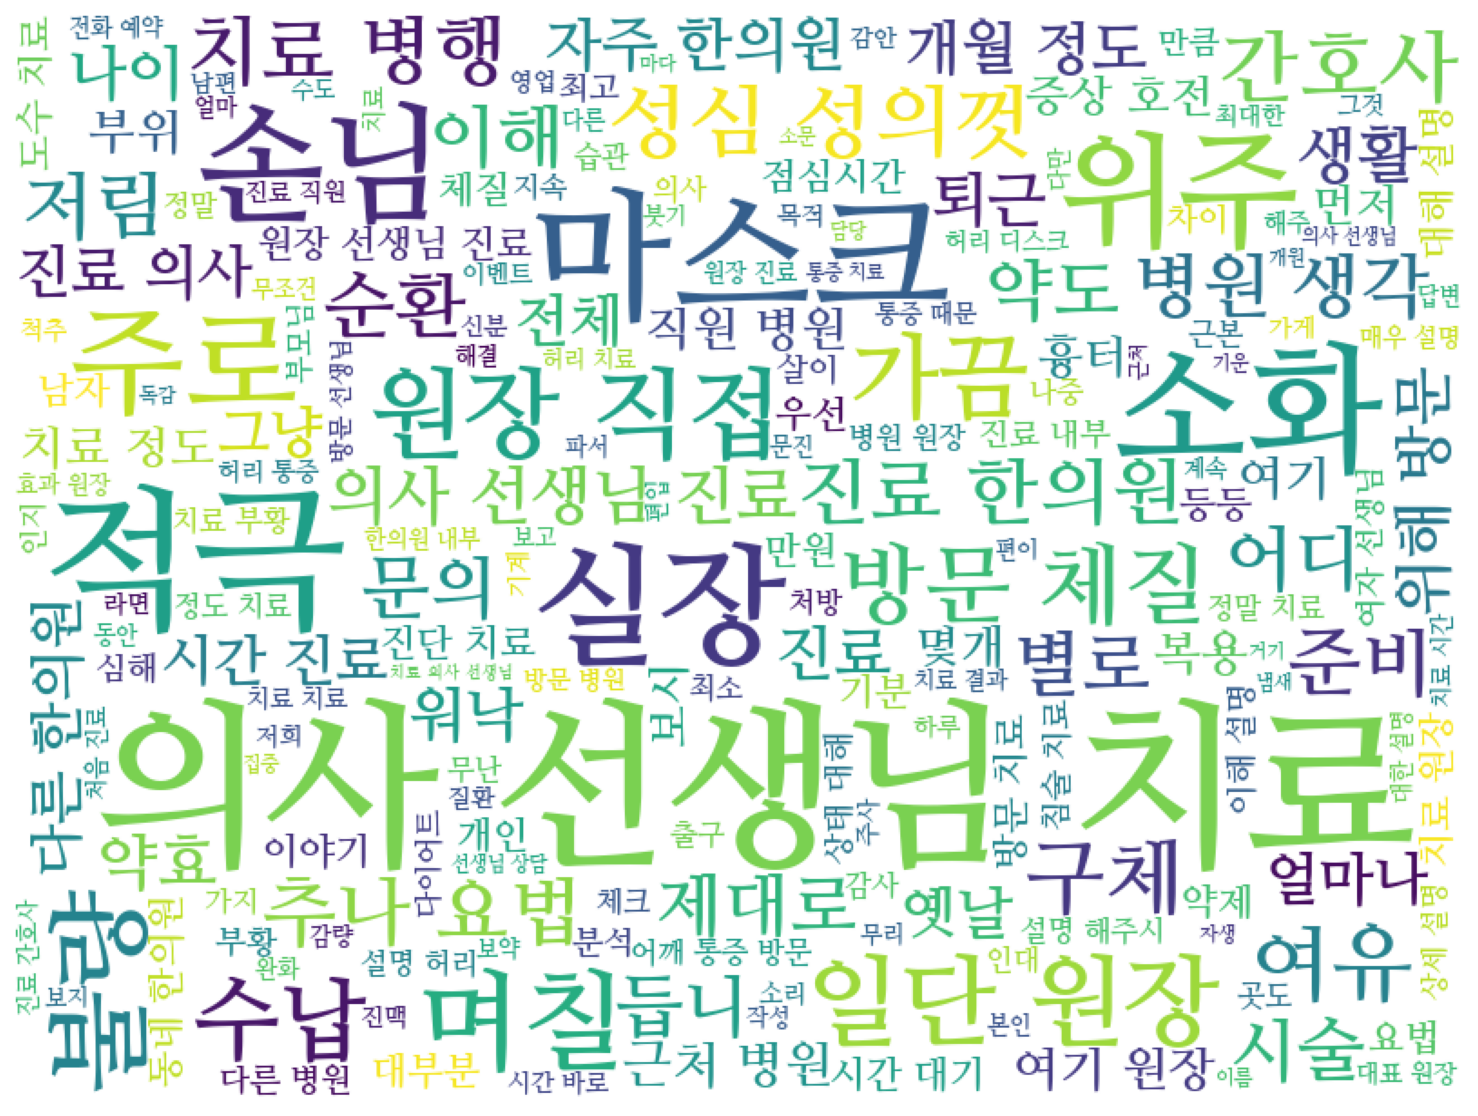

In [ ]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **NETWORK**

In [191]:
for_network.head()

hospital  stars                                            reviews adress
228   포도나무한의원    5.0  [병원, 환자, 의견, 내면, 여기, 더, 말, 약간, 니, 뭘알, 느낌, 침, 치...     경기
234  올바른경희한의원    5.8  [예약, 대기, 시간, 진료, 진료, 치료, 설명, 진료, 비, 안내, 침, 권유,...     경기
235  올바른경희한의원    5.8  [기력, 것, 집, 근처, 보약, 방문, 보약, 때문, 하니, 검사, 및, 상담, ...     경기
2    삼성서울연합의원    6.0  [어르신, 대기, 진료, 처음, 맥, 디테, 대기, 시간, 진료, 시간, 제대로, ...     경기
23      행복한의원    6.0  [부담, 허리, 통증, 내, 침, 치료, 추나, 요법, 의사, 선생님, 한약, 진료...     경기

In [192]:
network_an = []

for i in for_network.reviews:
    if '의심' in i:
        network_an.append(i)
    if '본전' in i :
        network_an.append(i)
    if '정치' in i :
        network_an.append(i)
    if '감수성' in i:
        network_an.append(i)
    if '언성' in i:
        network_an.append(i)
    if '무용지물' in i:
        network_an.append(i) 
    if '리뷰' in i:
        network_an.append(i)
    if '플랫폼' in i:
        network_an.append(i)
    if '전화' in i:
        network_an.append(i)
    if '교육' in i:
        network_an.append(i)
    if '통장' in i:
        network_an.append(i)
 
network_an_df = pd.DataFrame({'reviews': network_an})
print(network_an_df.shape)
network_an_df.head()

(30, 1)


reviews
0  [기력, 것, 집, 근처, 보약, 방문, 보약, 때문, 하니, 검사, 및, 상담, ...
1  [직원, 조금, 바, 곳, 한의원, 원장, 부위, 부연, 설명, 치료, 말씀, 래야...
2  [다이어트, 관련, 환, 효과, 방문, 선생님, 약, 제, 몸, 제, 리뷰, 보고,...
3  [원장, 말씀, 질문, 대답, 말씀, 이해도, 과잉, 진료, 어그, 다음, 방문, ...
4  [예약, 진표, 작성, 기본, 검사, 키, 체중, 혈압, 포함, 시간, 정도, 대기...

In [193]:
from apyori import apriori
result = (list(apriori(network_an_df.reviews, min_support = 0.6)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.6)].sort_values(by='support', ascending = False)
df.head()
print(df.shape)

(1293, 4)


In [194]:
network_df = df.copy()
# network_df
df_network = network_df[network_df['length']==2]
df_network.head()
print(df_network.shape)

(82, 4)


In [162]:
##이거 안씀

index= []

for num, i in enumerate (df_network['items']):
    if '의심' in i:
        index.append(num)
    if '본전' in i:
        index.append(num)
    if '정치' in i:
        index.append(num)
    if '감수성' in i:
        index.append(num)
    if '언성' in i:
        index.append(num)
    if '무용지물' in i:
        index.append(num)
    if '리뷰' in i:
        index.append(num)
    if '플랫폼' in i:
        index.append(num)
    if '전화' in i:
        index.append(num)
    if '교육' in i:
        index.append(num)
    if '통장' in i:
        index.append(num)

In [195]:
net_an = df_network.iloc[index]
net_an.head()

items   support                                 ordered_statistics  \
93  (치료, 전화)  0.666667  [((), (치료, 전화), 0.6666666666666666, 1.0), ((전화...   
74  (설명, 전화)  0.633333  [((), (설명, 전화), 0.6333333333333333, 1.0), ((설명...   
27  (기본, 전화)  0.600000  [((), (기본, 전화), 0.6, 1.0), ((기본), (전화), 1.0, 1...   
21   (전화, 것)  0.600000  [((), (전화, 것), 0.6, 1.0), ((것), (전화), 1.0, 1.4...   
83   (약, 전화)  0.600000  [((), (약, 전화), 0.6, 1.0), ((약), (전화), 0.947368...   

    length  
93       2  
74       2  
27       2  
21       2  
83       2

In [199]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (df_network['items'])
G.add_edges_from(ar)
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


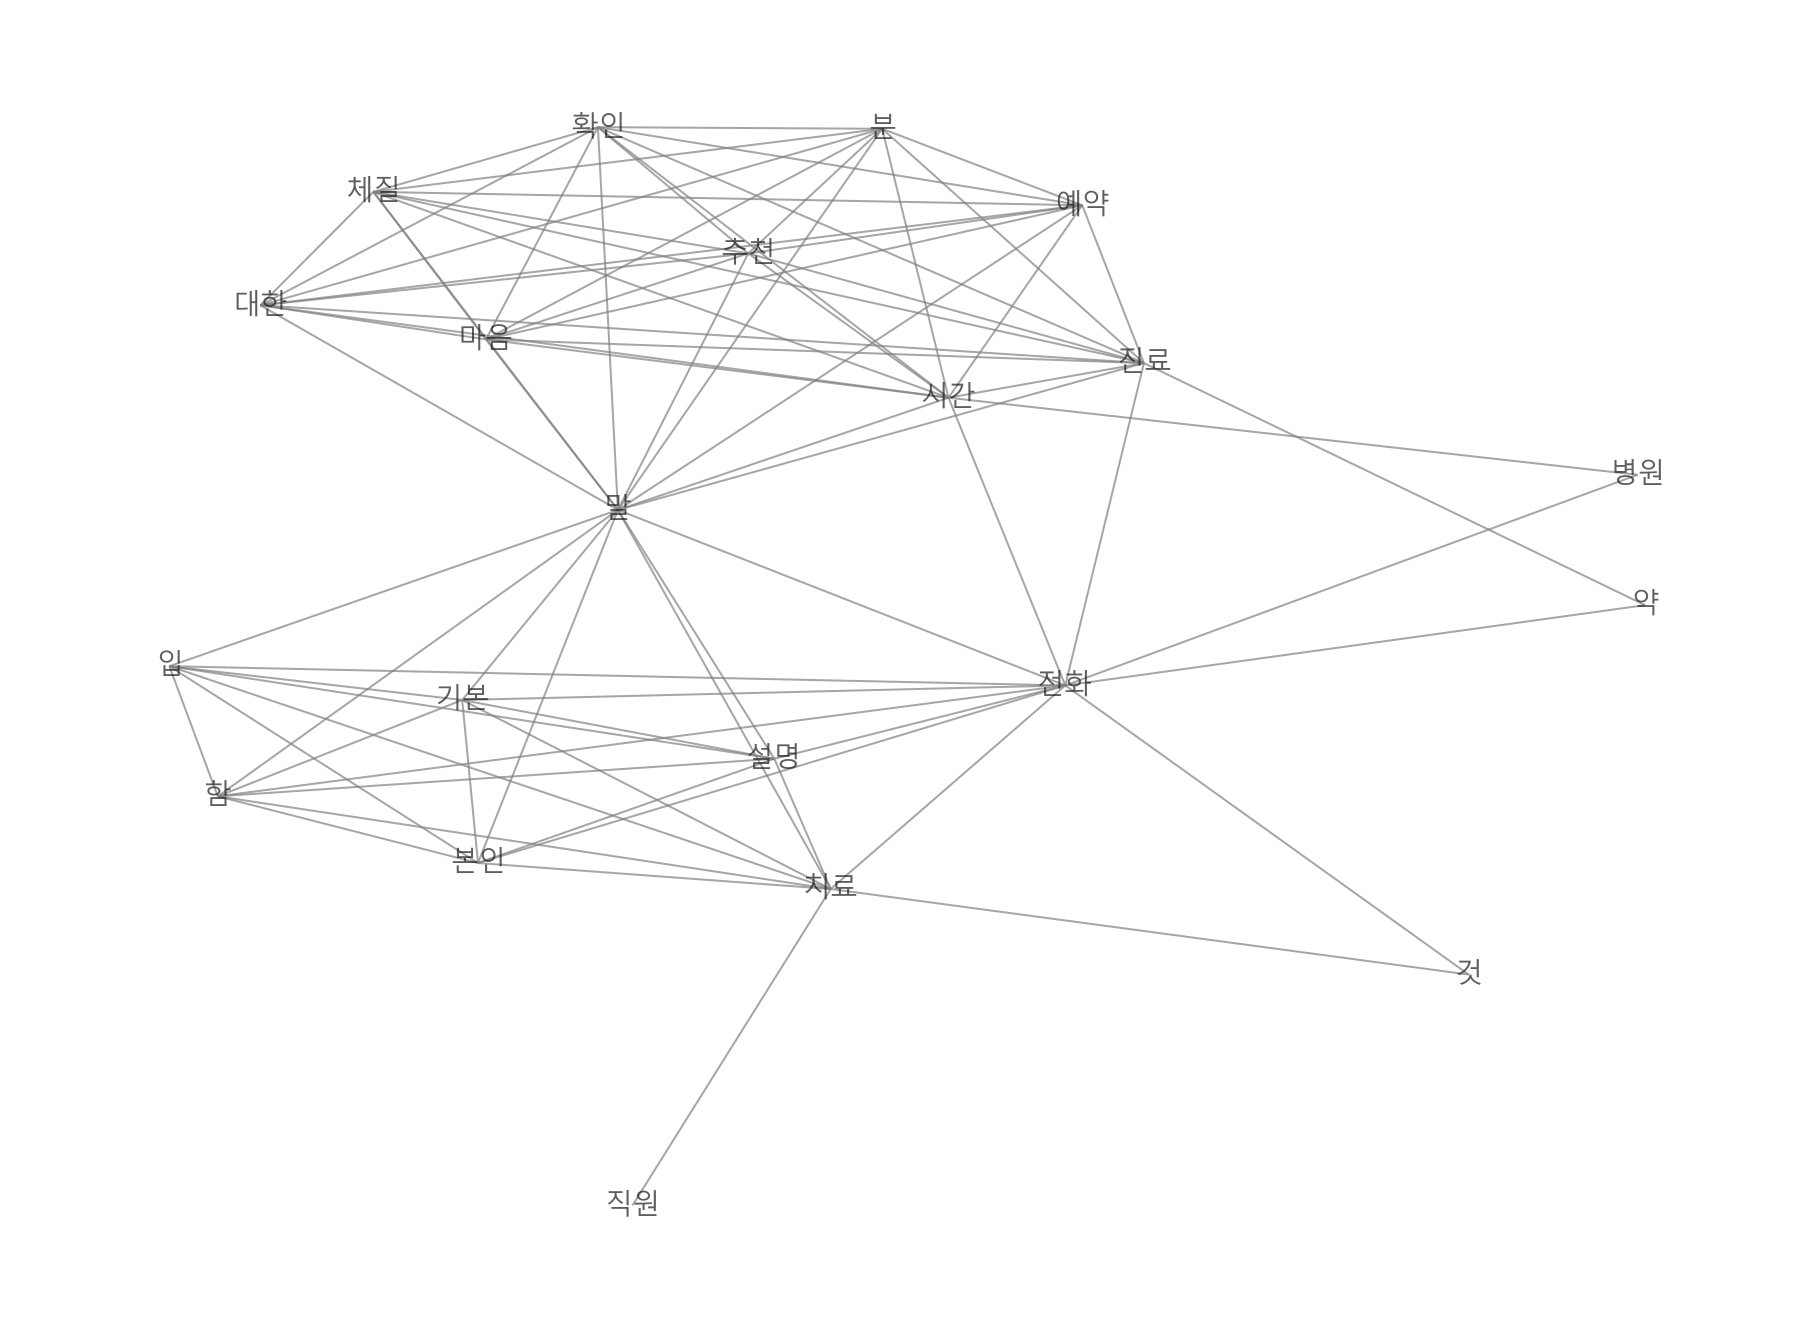

In [200]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

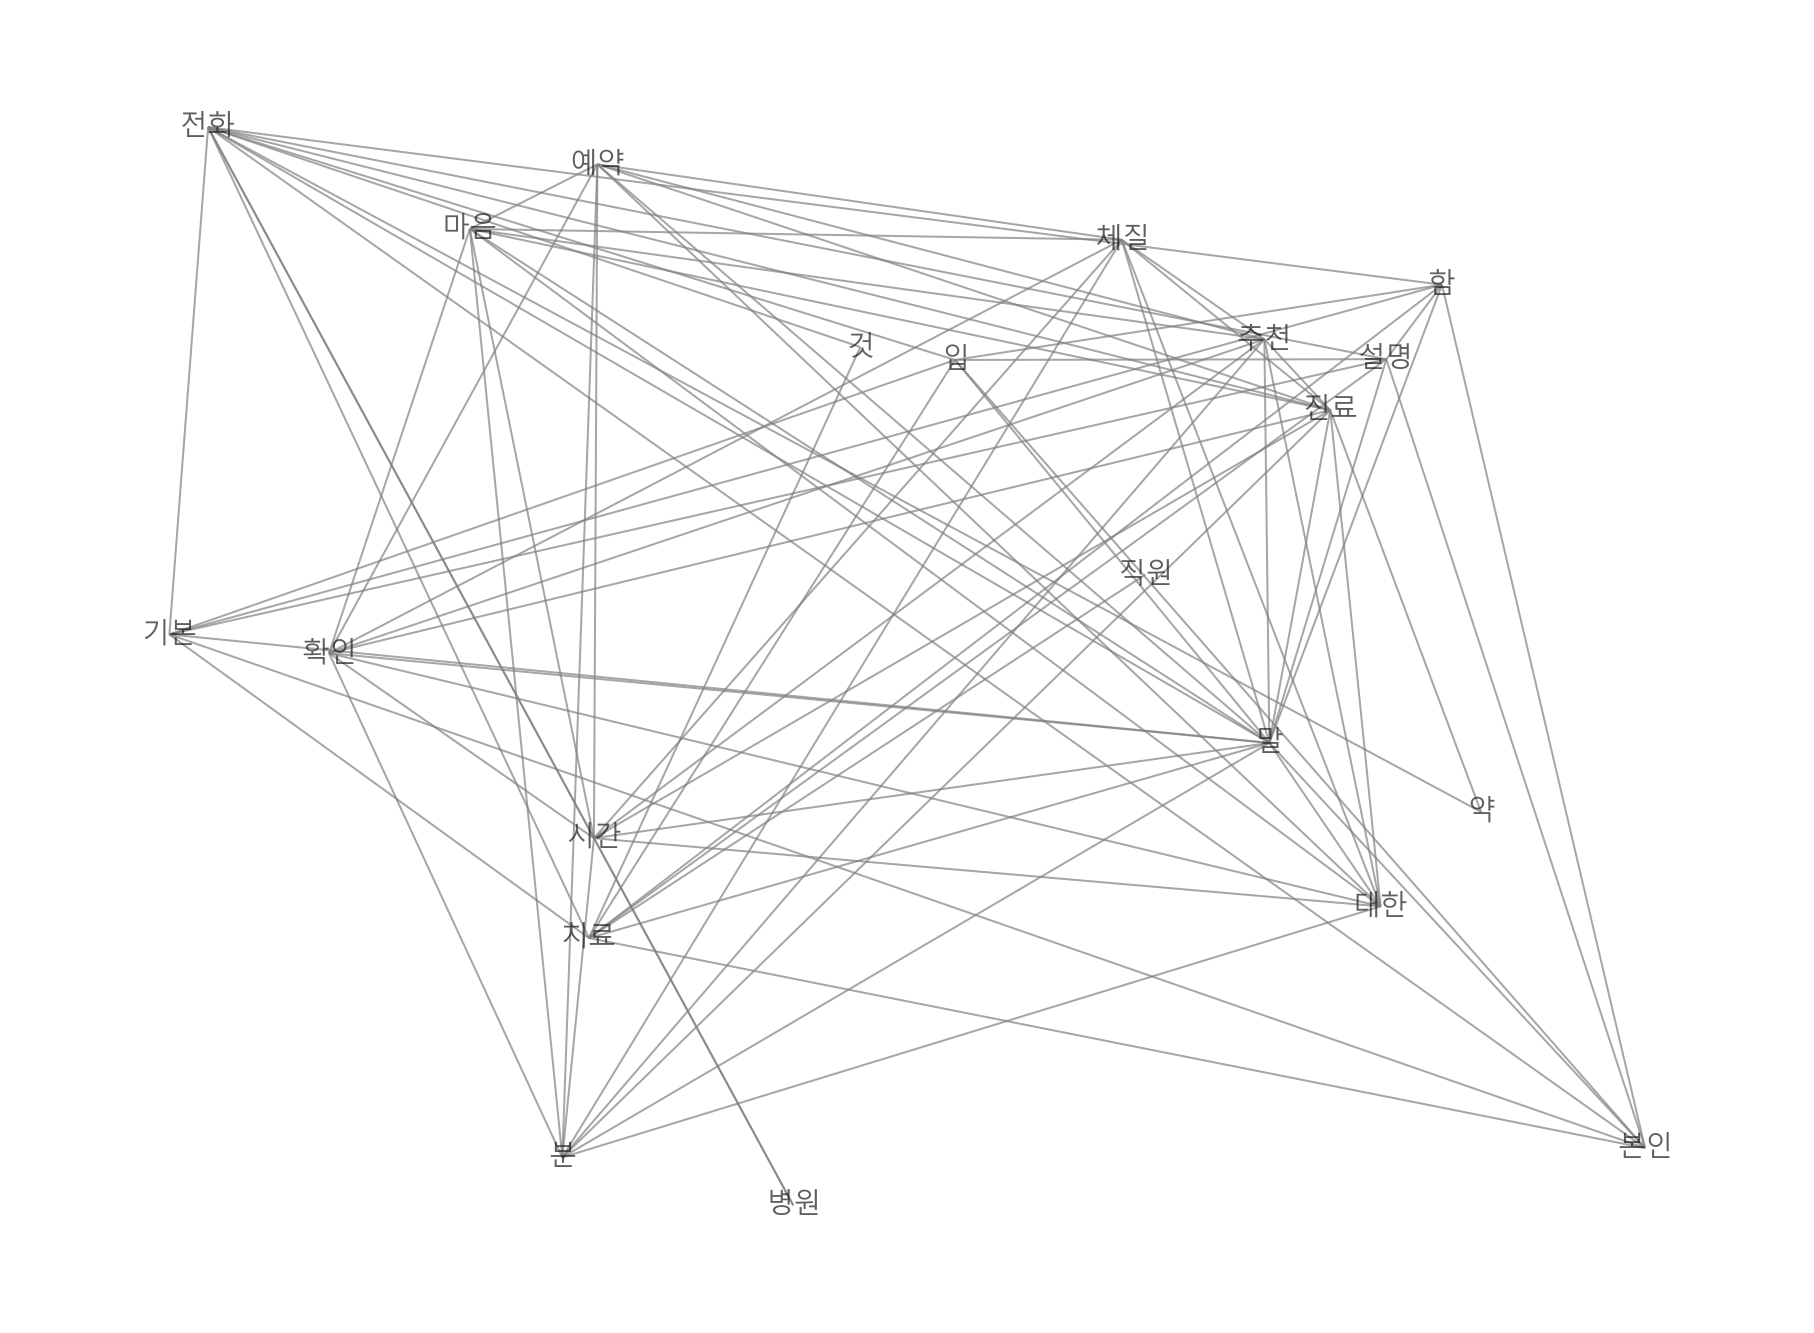

In [201]:
pos = nx.random_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

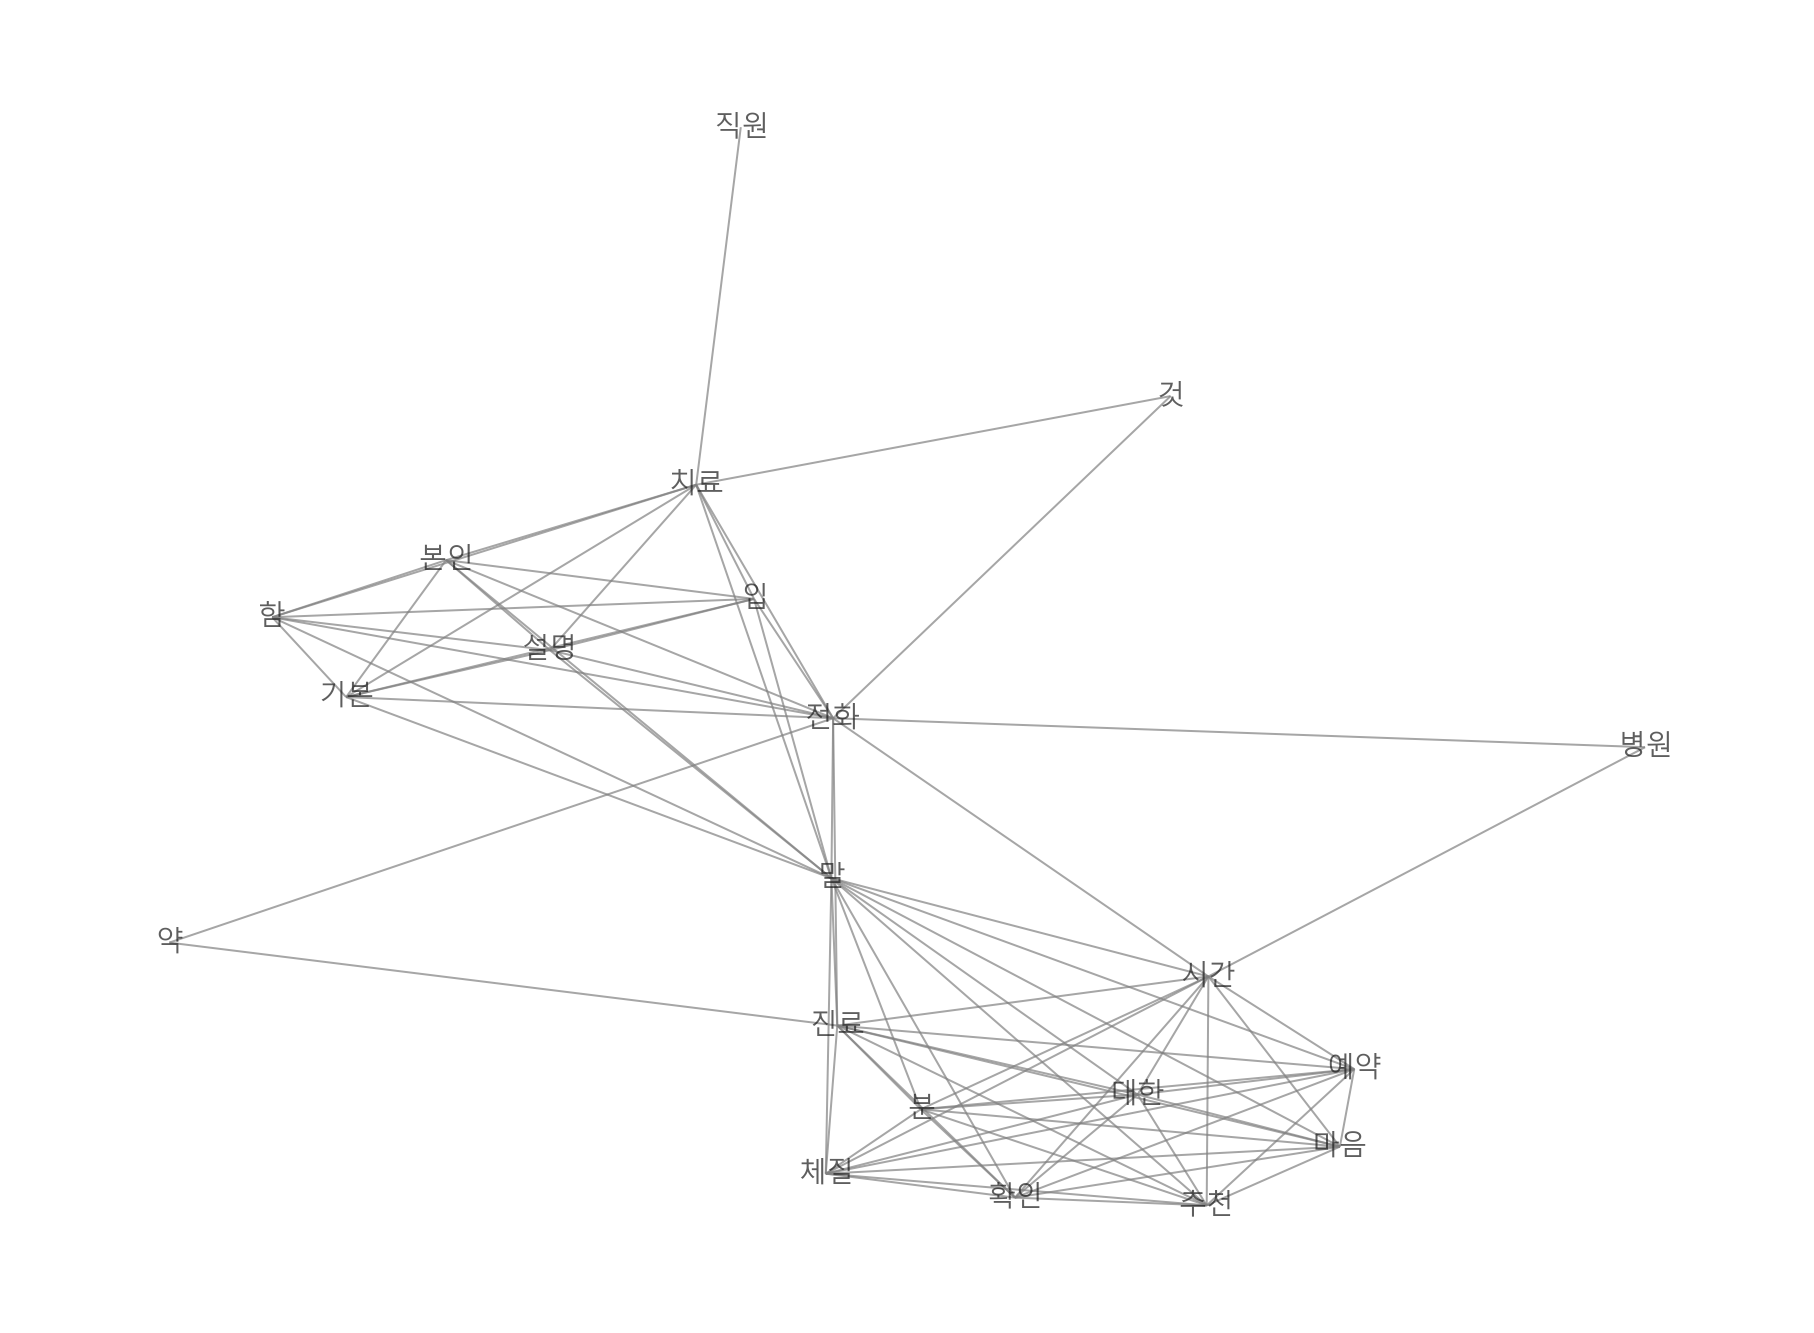

In [202]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

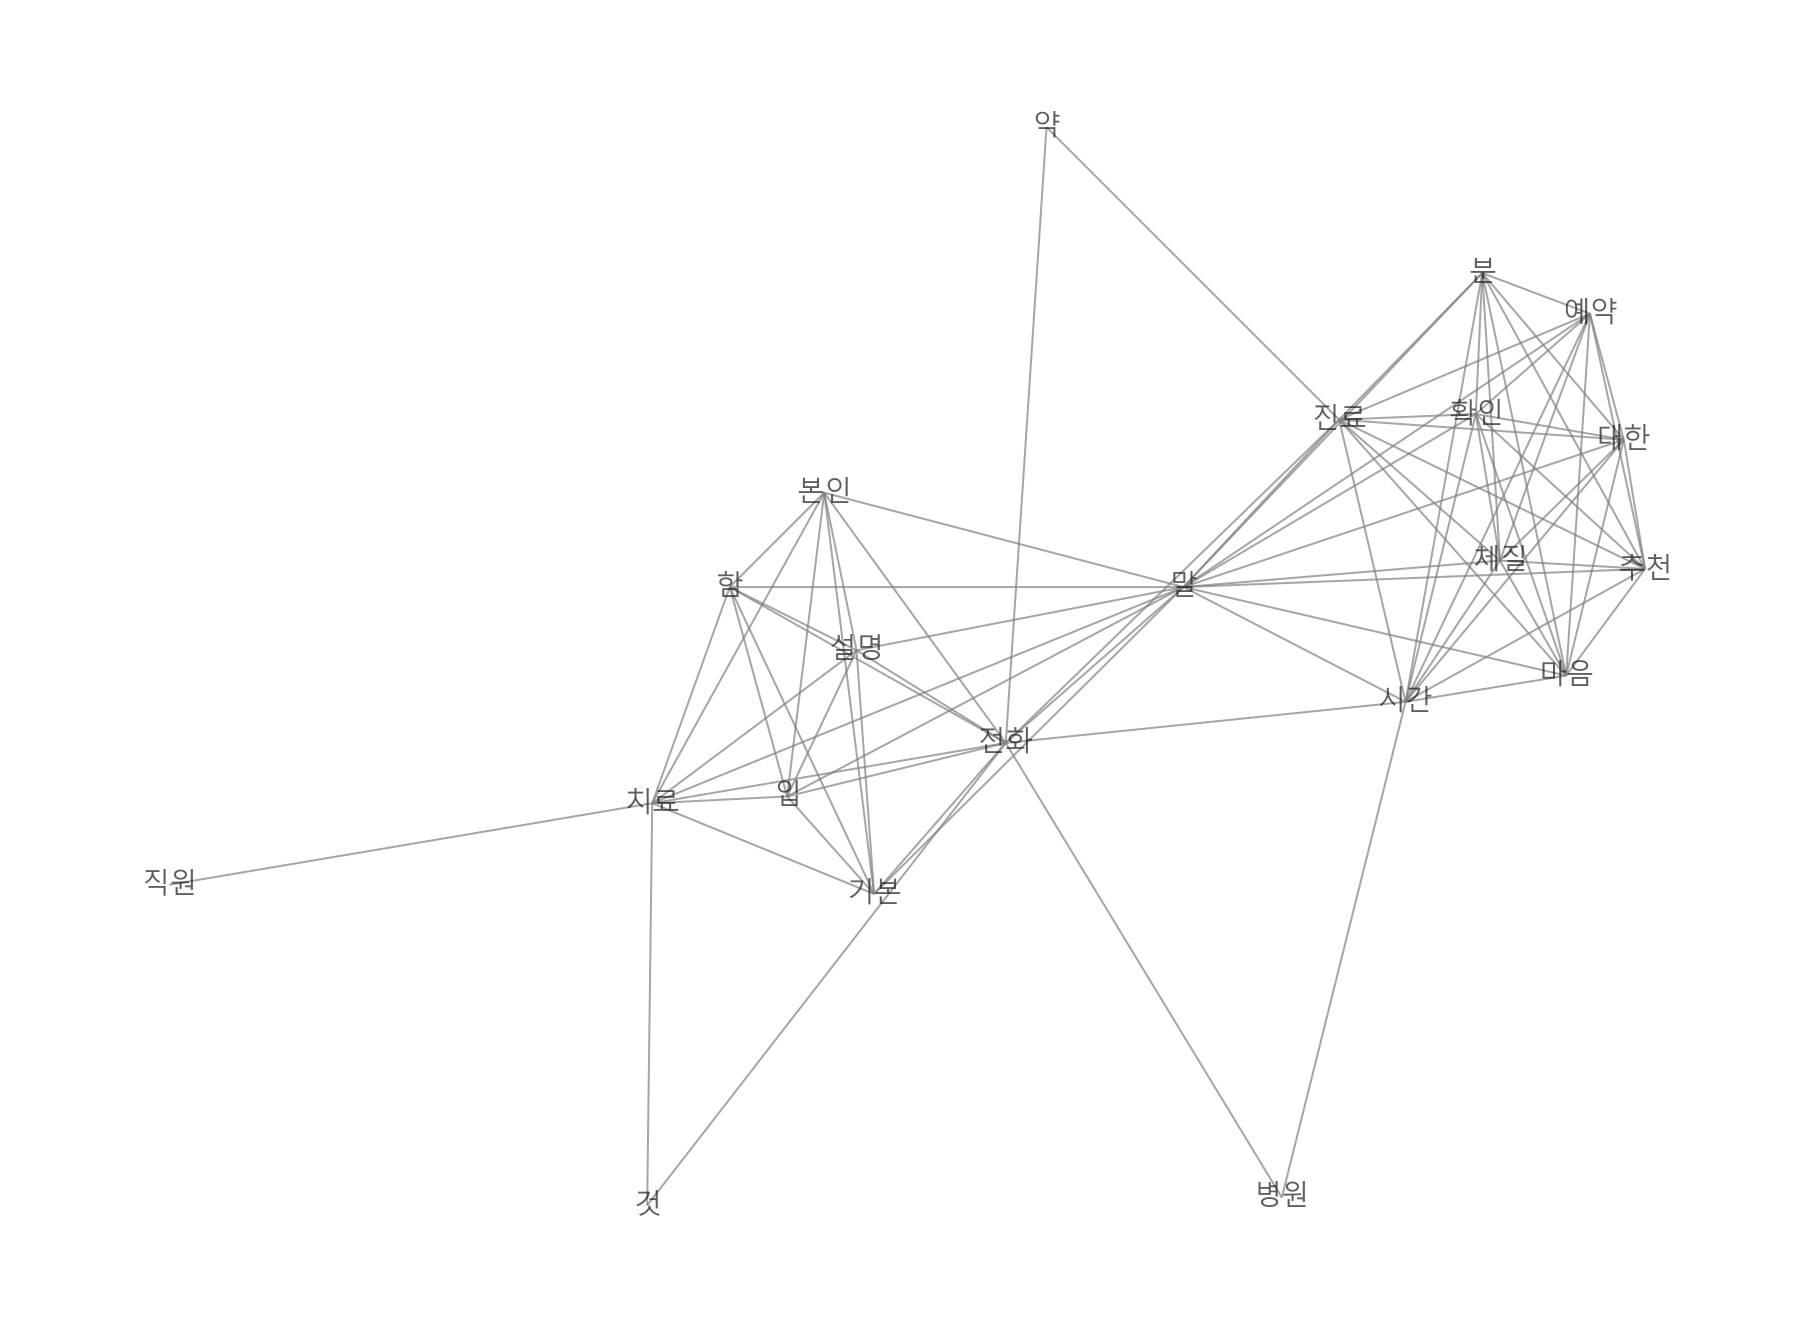

In [203]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

In [186]:
from apyori import apriori
result = (list(apriori(for_network.reviews, min_support = 0.07)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.07)].sort_values(by='support', ascending = False)
df.head()
print(df.shape)

(232, 4)


In [187]:
network_df = df.copy()
# network_df
df_network = network_df[network_df['length']==2]
df_network.head()
print(df_network.shape)

(136, 4)


In [188]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (df_network['items'])
G.add_edges_from(ar)

In [189]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


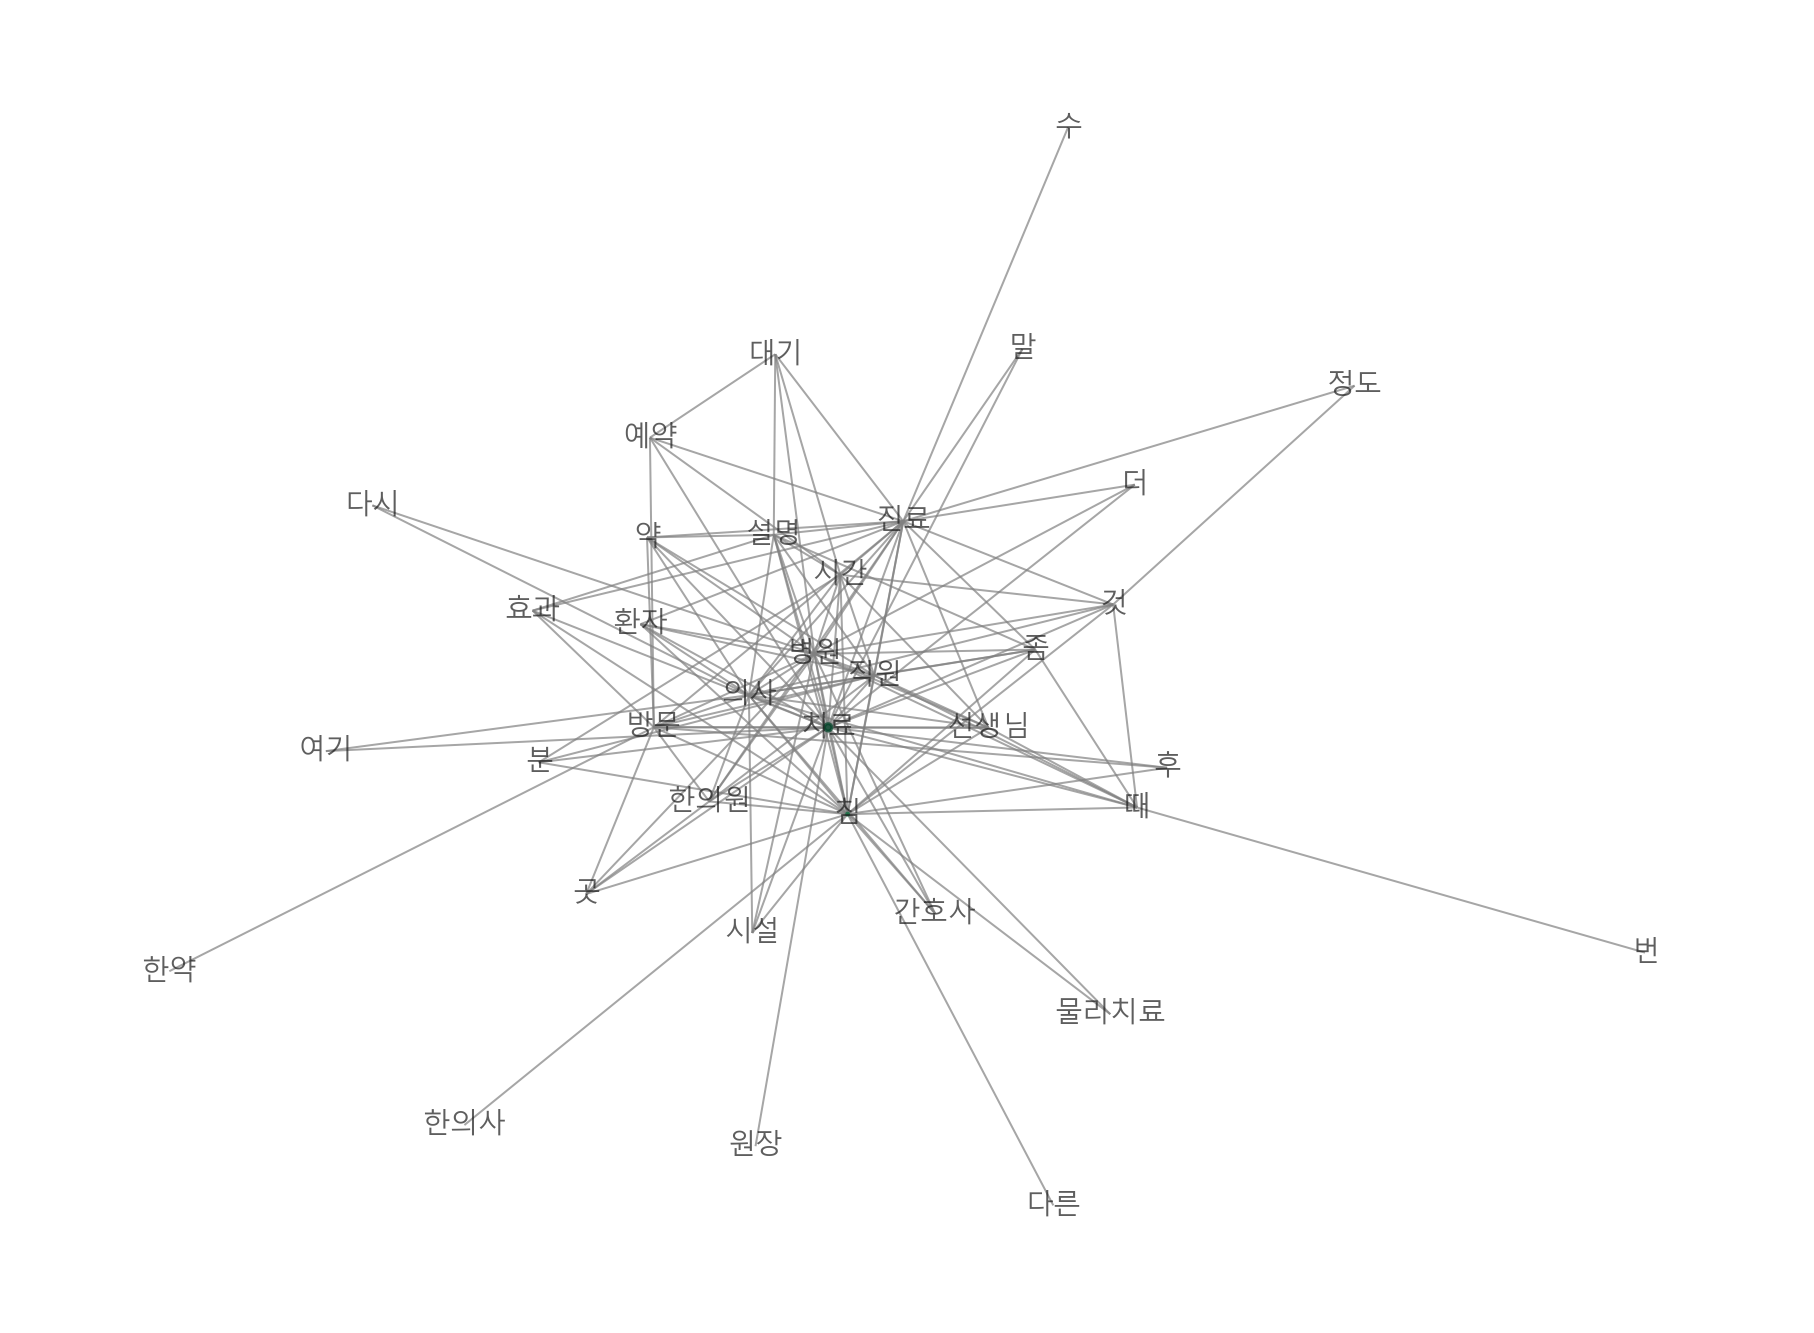

In [190]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

In [151]:
for i in kyungki.reviews:
    if '체질' in i:
        print('-', i)

- 근육통이 있을 때 침 맞고 물리치료 하면 몸이 풀려요초진으로 진맥을 짚어 주셨을 때 제 생활패턴과 체질을 꿰뚫으셨어요 그에 맞게 침도 잘 놓아주시고 주의사항도 안내해주십니다 내방할때마다 늘 친절하게 맞아주셔서 좋아요 원장님은 좋으신데 물리치료사분들이 조금 자주 바뀌고 여러사람이 쓰는 치료실이다보니 청결함은 조금 떨어져요 시간대를 잘 못 맞추면 1시간 이상의 대기시간이 발생하기도 해요
- 다이어트한약 애기낳고또먹어야지다이어트한약 처방받아 먹었는데 체질에따라 지금현재몸무게 및 생활습관에 따라 어떻게 진행하면되는지 잘말씀해주십니다 매회 방문시마다 체지방측정후 그에따른 약변화와 처방을 바꿔서해주십니다 1개월치분량에 요요현상안오는약까지 받아먹었습니다 직원들모두 친절하고 병원도깔끔합니다 기타 의료기기들도 괜찮고 저는효과를봤어서 또갈거긴할거에요 아무래도 한약이다보니 가격대가조금있어서 부담스러운게 사실이지만 효과가그만큼있으니 포기도못하겠네요 웨딩한달 전 급하게먹었는데도 2키로빠졌어요  요요방지약도처방해주셔서 아직도 유지중입니다
- 자주 아프지만 양방에서 이상이 없어 약도 없이 지냈습니다 오랜 직장생활과 약한 위로 자주 체하고 아팠습니다응급실 가기도 여러번 입원도 몇번했습니다한약 일년에 두번정도 먹고 침도 아플때 맞고오면 좋아집니다이번에도 한재지어 꾸준히 먹으며 다니고 있습니다 막내도 내 체질과 비슷해 한번 지어 먹었는데 약도 잘 먹고 많이 밥도 잘 먹었네요 가을되면 한번 더 먹여야겠어요늘 친절하고 깨끗하고 편안한 분위기에 좋습니다
- 친절하신 의료진과 효과빠른 한약원장님이 약 처방 전에 꼼꼼히 체질이나 제 성향에 맞춰주시려 하셔서 좋았고 설명도 이해하기 쉽게 해주셔서 재밌었어요ㅎㅎ 그리고 열심히 응원도 해주셔서 좋았어요 직원분들 모두 친절했고 대기시간은 길었지만 안마의자가 있고 다양한 책자가 있어서 시간이 금방 갔어요 병원시설은 오래되진 않아 보였고 만족 합니다
- 우선 허리가 아파서 방문했습니다 체질에 맞게 침을 놓는 한의원이라고 유명합니다 8 체질이라고 해서 체질별 